
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Airbnb_Logo_B%C3%A9lo.svg/2560px-Airbnb_Logo_B%C3%A9lo.svg.png" alt="Airbnb Logo" style="width:30%; height:auto;">







# **Guest Satisfaction Prediction Project**

## **Data Description**

**This project aims to help Airbnb hosts predict the satisfaction level of guests booking their listings. By leveraging machine learning, the goal is to build a model that can anticipate guest satisfaction based on various listing and host features.**

**The model is trained on a dataset compiled from the Airbnb platform, using the `review_scores_rating` as the target variable. By analyzing factors such as location, amenities, host behavior, and listing attributes, we aim to provide insights that can help hosts improve their offerings and enhance the guest experience.**

| Column                             | Description                                                  |
|------------------------------------|--------------------------------------------------------------|
| id                                 | Unique identifier for the listing.                           |
| listing_url                        | URL to the Airbnb listing.                                   |
| name                               | Title of the listing.                                        |
| summary                            | Short summary description provided by the host.              |
| space                              | Description of the space guests can access.                  |
| description                        | Full description of the listing.                             |
| neighborhood_overview              | Overview of the neighborhood.                                |
| notes                              | Additional notes from the host.                              |
| transit                            | Information about nearby transit options.                    |
| access                             | Details on guest access to the property.                     |
| interaction                        | Information on how hosts interact with guests.               |
| house_rules                        | House rules set by the host.                                 |
| thumbnail_url                      | Thumbnail image URL of the listing.                          |
| host_id                            | Unique identifier for the host.                              |
| host_url                           | URL to the host’s profile.                                   |
| host_name                          | Name of the host.                                            |
| host_since                         | Date the host joined Airbnb.                                 |
| host_location                      | Location of the host.                                        |
| host_about                         | Bio or description provided by the host.                     |
| host_response_time                 | Average time the host takes to respond.                      |
| host_response_rate                 | Percentage of messages responded to.                         |
| host_acceptance_rate              | Rate at which host accepts bookings.                         |
| host_is_superhost                  | Whether the host is a superhost.                             |
| host_neighbourhood                 | Host’s self-described neighborhood.                          |
| host_listings_count                | Number of listings the host has.                             |
| host_total_listings_count          | Total listings count (including inactive).                   |
| host_has_profile_pic               | Whether the host has a profile picture.                      |
| host_identity_verified             | Whether the host’s identity is verified.                     |
| street                             | Street address of the listing.                               |
| neighbourhood                      | Name of the local neighborhood.                              |
| neighbourhood_cleansed             | Cleaned or standardized neighborhood name.                   |
| city                               | City of the listing.                                         |
| state                              | State where the listing is located.                          |
| zipcode                            | Zip code of the listing.                                     |
| market                             | General market area.                                         |
| smart_location                     | Formatted location string.                                   |
| country_code                       | Country code.                                                |
| country                            | Full country name.                                           |
| latitude                           | Latitude of the listing.                                     |
| longitude                          | Longitude of the listing.                                    |
| is_location_exact                  | Whether the location is exact.                               |
| property_type                      | Type of property (e.g., apartment, house).                   |
| room_type                          | Type of room available.                                      |
| accommodates                       | Number of people the listing can accommodate.                |
| bathrooms                          | Number of bathrooms.                                         |
| bedrooms                           | Number of bedrooms.                                          |
| beds                               | Number of beds.                                              |
| bed_type                           | Type of bed.                                                 |
| amenities                          | List of included amenities.                                  |
| square_feet                        | Size of the listing in square feet.                          |
| nightly_price                      | Price per night.                                             |
| price_per_stay                     | Total price for a stay.                                      |
| security_deposit                   | Security deposit amount.                                     |
| cleaning_fee                       | Cleaning fee charged.                                        |
| guests_included                    | Number of guests included in base price.                     |
| extra_people                       | Extra charge for additional guests.                          |
| minimum_nights                     | Minimum nights required per booking.                         |
| maximum_nights                     | Maximum nights allowed per booking.                          |
| number_of_reviews                  | Total number of reviews.                                     |
| number_of_stays                    | Total number of stays.                                       |
| first_review                       | Date of the first review.                                    |
| last_review                        | Date of the most recent review.                              |
| review_scores_rating               | Overall review score (target variable).                      |
| requires_license                   | Whether a license is required.                               |
| instant_bookable                   | Whether guests can book instantly.                           |
| is_business_travel_ready           | Whether listing is ready for business travelers.             |
| cancellation_policy                | Policy on cancellations.                                     |
| require_guest_profile_picture      | Whether guest profile pictures are required.                 |
| require_guest_phone_verification   | Whether guest phone verification is required.                |

## **Data Overview**

### **Importing Libraries**

In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore', category=UserWarning, module='lightgbm')
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

### **Data Exploration**

In [336]:
df = pd.read_csv("GuestSatisfactionPrediction.csv")

In [337]:
df.shape

(8724, 71)

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8724 entries, 0 to 8723
Data columns (total 71 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                8724 non-null   int64  
 1   listing_url                       8724 non-null   object 
 2   name                              8724 non-null   object 
 3   summary                           8724 non-null   object 
 4   space                             8724 non-null   object 
 5   description                       8724 non-null   object 
 6   neighborhood_overview             6490 non-null   object 
 7   notes                             5215 non-null   object 
 8   transit                           5975 non-null   object 
 9   access                            6011 non-null   object 
 10  interaction                       6164 non-null   object 
 11  house_rules                       6754 non-null   object 
 12  thumbn

In [339]:
df.columns

Index(['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'thumbnail_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'nightly_price', 'price_per_stay', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',

In [340]:
df.head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,last_review,review_scores_rating,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,host_rating,guest_favorite
0,21514496,https://www.airbnb.com/rooms/21514496,PRIVATE BEDROOM DOWNTOWN 2 BED/ 2 BATH #5,Beautiful 2 bedroom 2 bathroom furnished apart...,Each apartment is fully furnished and consists...,Beautiful 2 bedroom 2 bathroom furnished apart...,NaN,***Note that the pictures on the website may o...,NaN,NaN,...,11/17/2017,80,f,f,f,strict_14_with_grace_period,f,f,NaN,0
1,990185,https://www.airbnb.com/rooms/990185,4 bed/2 ba Family Retreat in SD,We feel our house is a great place for a famil...,Our house is ideal for large families or group...,We feel our house is a great place for a famil...,Neighborhood Mira Mesa is a culturally diverse...,NaN,NaN,Our guests may use the BBQ grill.,...,7/31/2019,97,f,f,f,moderate,f,f,NaN,0
2,19878244,https://www.airbnb.com/rooms/19878244,San Diego Dream Villa,"Zen, Luxury and the Best Location in Americas ...","San Diego Dream Villa, this unique and luxurio...","Zen, Luxury and the Best Location in Americas ...",This amazing house is located within a few min...,Im always available to make your trip experien...,"If you are bringing your car, remember that SD...",A couple of days before your arrival you will ...,...,7/16/2019,98,f,f,f,strict_14_with_grace_period,f,f,4.93,1
3,24561458,https://www.airbnb.com/rooms/24561458,Studio with Piazza View in Downtown Little Italy,Start the day with breakfast on the sunny pati...,"Newly built, this beautiful studio is located ...",Start the day with breakfast on the sunny pati...,"Spend the day at the zoo in Balboa Park, or ex...",The apartment is located on the Piazza Della F...,"MTS, Train, and Trolly are close by. The airpo...",You will not be sharing the apartment with any...,...,8/3/2019,98,f,t,f,moderate,f,f,NaN,0
4,32269829,https://www.airbnb.com/rooms/32269829,Beachside Retreat w/ Private Rooftop Deck w/ V...,This is a 2 bedroom/1 bathroom beachside unit...,Beach living at its finest! The highlight of ...,This is a 2 bedroom/1 bathroom beachside unit...,Mission Beach is an amazing coastal community ...,NaN,The Boardwalk and Bayside Walk are wonderful w...,This is a private home that is part of a typic...,...,6/30/2019,100,f,t,f,strict_14_with_grace_period,f,f,4.79,0


In [341]:
df.tail()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,last_review,review_scores_rating,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,host_rating,guest_favorite
8719,34290139,https://www.airbnb.com/rooms/34290139,#5 Gaslamp Apartment home close to Conv Ctr.,"Located in the heart of the Gaslamp Quarter, t...",Classic fittings and furnishings in the kitche...,"Located in the heart of the Gaslamp Quarter, t...",- We have provided you with a GUEST MANUAL wit...,NaN,Everything in the area is available by walking...,NaN,...,8/5/2019,100,f,f,f,strict_14_with_grace_period,f,f,4.75,0
8720,11412129,https://www.airbnb.com/rooms/11412129,Mission Beach Condo Steps to Ocean and Bay,"Location does not get better. Steps to ocean, ...","Uniquely positioned close to Bay, Ocean, PB, M...","Location does not get better. Steps to ocean, ...",Mission Beach is a community built on a sandba...,The second bed is a full size blow up mattress...,On bus route and close to taxi stand across th...,"Wi-Fi, Netflix, Grill, Bikes, Coffee, Frisbee,...",...,9/17/2017,91,f,f,f,moderate,f,f,4.40,0
8721,26169248,https://www.airbnb.com/rooms/26169248,Close to Downtown,Welcome to sunny San Diego in South Park. A cl...,Charming and comfortable!,Welcome to sunny San Diego in South Park. A cl...,We are close to everything! Lots of local bars...,Unit is stocked with all necessities. Kitchen ...,Parking on the street next to apartment. Uber/...,Use of entire apartment. Laundry facility on p...,...,7/21/2019,100,f,t,f,moderate,f,f,NaN,0
8722,29190854,https://www.airbnb.com/rooms/29190854,University of CA San Diego near La Jolla with TV,Luxury single family home near I-5 Freeway and...,"Your stay will include some high end touches, ...",Luxury single family home near I-5 Freeway and...,"Great weather year round, solar-powered pool, ...",NaN,Use your bikes in neighborhood and nearby cany...,1 private bedroom and 1 shared bath. 1 half ba...,...,6/9/2019,88,f,t,f,strict_14_with_grace_period,f,f,4.80,0
8723,15535798,https://www.airbnb.com/rooms/15535798,Tropical Bay Park Home,"While we are out of town, we are offering the ...",Custom house built by a former boat-builder wi...,"While we are out of town, we are offering the ...",Quiet neighborhood. Walkable distance from a s...,Some notes on accessibility: The bed in the gu...,Lots of street parking. Most destinations requ...,"All of the first floor: 2 bedrooms, 1 bathroom...",...,7/30/2019,100,f,t,f,strict_14_with_grace_period,f,f,4.91,0


In [342]:
df.sample()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,last_review,review_scores_rating,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,host_rating,guest_favorite
1990,27231320,https://www.airbnb.com/rooms/27231320,Pacific Blue 202,Welcome! Pacific Coast Vacation Properties is ...,Welcome! Pacific Coast Vacation Properties is ...,Welcome! Pacific Coast Vacation Properties is ...,The building is located on the corner of Pacif...,What you can find in this condo: -3 bedrooms w...,NaN,Entire condo,...,7/6/2019,99,f,t,f,strict_14_with_grace_period,f,f,NaN,0


In [343]:
df.describe(exclude='object')

,id,thumbnail_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,beds,square_feet,guests_included,minimum_nights,maximum_nights,number_of_reviews,number_of_stays,review_scores_rating,host_rating,guest_favorite
count,8.724000e+03,0.0,8.724000e+03,0.0,8723.00000,8723.00000,8724.000000,8724.000000,8724.000000,8723.000000,...,8721.000000,106.000000,8724.000000,8724.000000,8724.000000,8724.000000,8724.000000,8724.000000,4521.000000,8724.000000
mean,2.061576e+07,NaN,7.217782e+07,NaN,36.63900,36.63900,32.767648,-117.181171,4.478450,1.477645,...,2.383213,780.122642,2.385488,3.882164,612.218134,41.851674,83.703347,95.298945,4.763599,0.070724
std,1.022036e+07,NaN,7.192548e+07,NaN,148.16393,148.16393,0.063700,0.064124,2.966026,0.867093,...,1.854677,581.604721,2.309945,13.271263,1532.434921,63.566724,127.133448,6.871417,0.171413,0.256379
min,6.000000e+00,NaN,2.900000e+01,NaN,0.00000,0.00000,32.531380,-117.281240,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,20.000000,2.670000,0.000000
25%,1.331246e+07,NaN,1.281344e+07,NaN,1.00000,1.00000,32.725623,-117.245445,2.000000,1.000000,...,1.000000,500.000000,1.000000,1.000000,29.000000,5.000000,10.000000,94.000000,4.680000,0.000000
50%,2.122258e+07,NaN,4.407444e+07,NaN,2.00000,2.00000,32.756810,-117.168045,4.000000,1.000000,...,2.000000,600.000000,1.000000,2.000000,365.000000,17.000000,34.000000,97.000000,4.800000,0.000000
75%,2.896445e+07,NaN,1.148944e+08,NaN,9.00000,9.00000,32.797730,-117.139930,6.000000,2.000000,...,3.000000,1000.000000,3.000000,3.000000,1125.000000,52.000000,104.000000,100.000000,4.890000,0.000000
max,3.774504e+07,NaN,2.843016e+08,NaN,1737.00000,1737.00000,33.086070,-116.935990,24.000000,27.500000,...,22.000000,3800.000000,24.000000,800.000000,99999.000000,641.000000,1282.000000,100.000000,4.990000,1.000000


In [344]:
df.describe(exclude='number')

,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,...,cleaning_fee,extra_people,first_review,last_review,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,8724,8724,8724,8724,8724,6490,5215,5975,6011,6164,...,8068,8724,8724,8724,8724,8724,8724,8724,8724,8724
unique,8724,8672,8162,8295,8389,5361,4424,5093,5245,4983,...,292,69,1892,880,1,2,1,6,2,2
top,https://www.airbnb.com/rooms/21514496,Home away from home,"Featured in The New York Times, The Wall Stree...",- Private balcony - In-suite laundry - Fully-e...,"Featured in The New York Times, The Wall Stree...",South Mission,We offer rewards and complimentary upgrades to...,"We recommend a car for navigating San Diego, b...",#NAME?,We are available to assist you with absolutely...,...,$50.00,$0.00,7/21/2019,8/11/2019,f,t,f,strict_14_with_grace_period,f,f
freq,1,4,96,24,24,45,38,26,31,42,...,519,4441,75,541,8724,4614,8724,4057,8483,8439


## **Data Preprocessing**

### **Checking duplicates**

`Checking duplicates on whole data`

In [345]:
df.duplicated().sum()

0

`Checking duplicates on id column`

In [346]:
df.duplicated(subset='id').sum()

0

### **Fixing numerical columns**

In [347]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)

In [348]:
currency_columns = ['nightly_price', 'price_per_stay', 'extra_people', 'security_deposit', 'cleaning_fee']

for col in currency_columns:
    df[col] = df[col].str.replace(',', '').str.replace('$', '').astype(float)

In [349]:
df['zipcode']=df['zipcode'].str.replace("-", "")
df['zipcode']=df['zipcode'].astype(float)

### **Checking Nulls**

In [350]:
df.isnull().sum()

id                                     0
listing_url                            0
name                                   0
summary                                0
space                                  0
description                            0
neighborhood_overview               2234
notes                               3509
transit                             2749
access                              2713
interaction                         2560
house_rules                         1970
thumbnail_url                       8724
host_id                                0
host_url                               0
host_name                              1
host_since                             1
host_location                         14
host_about                          2462
host_response_time                  1057
host_response_rate                  1057
host_acceptance_rate                8724
host_is_superhost                      1
host_neighbourhood                  1232
host_listings_co

**Handling nulls using mode**

In [351]:
mode_fill_columns = ['market', 'host_neighbourhood', 'state', 'neighbourhood', 'host_location','host_response_time','zipcode','host_since','host_is_superhost','host_has_profile_pic','host_identity_verified','host_name']

for col in mode_fill_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

**Handling nulls using median**

`We chose to fill missing values using the median instead of the mean because the distribution of several columns showed skewness.`

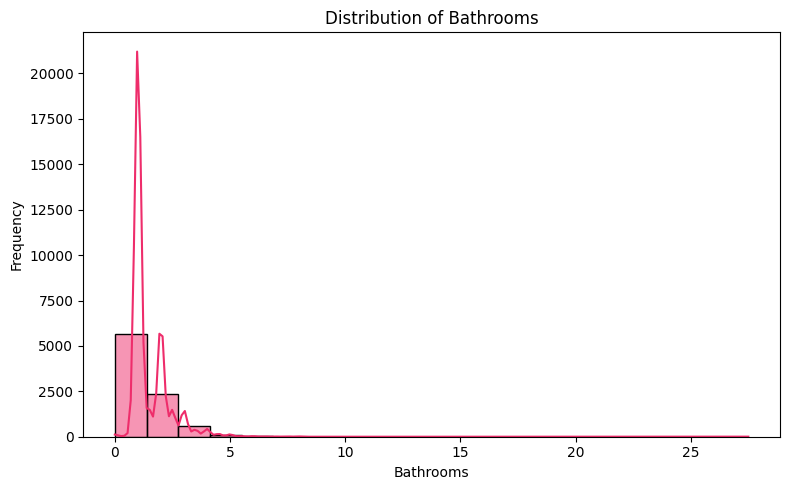

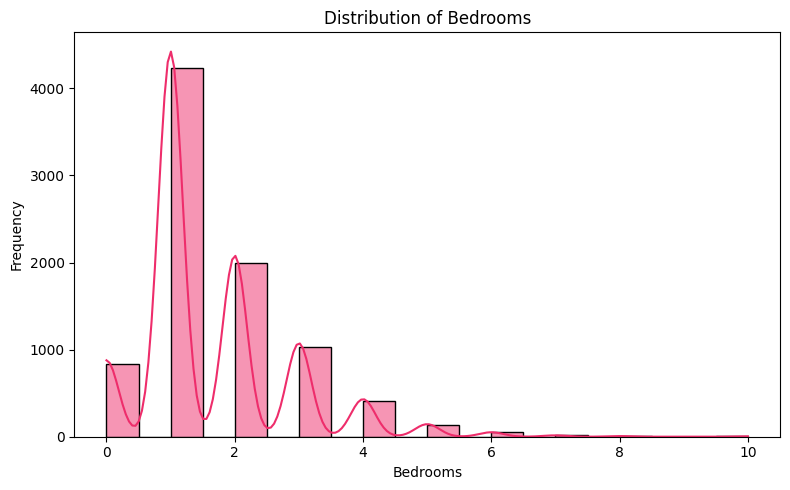

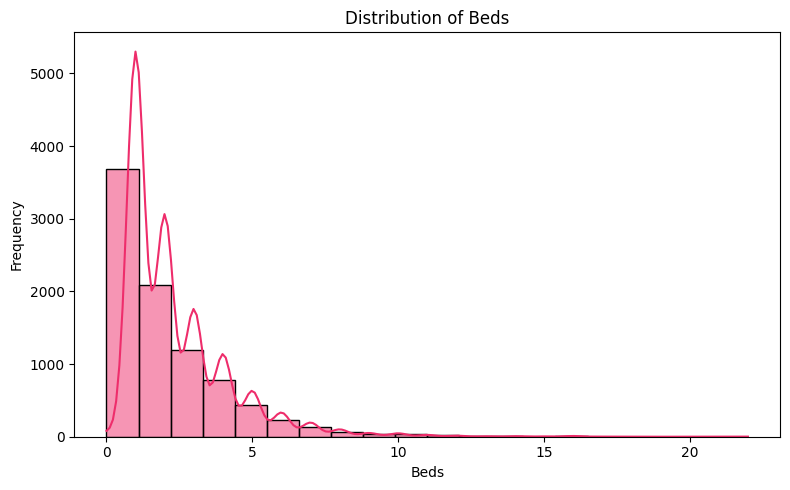

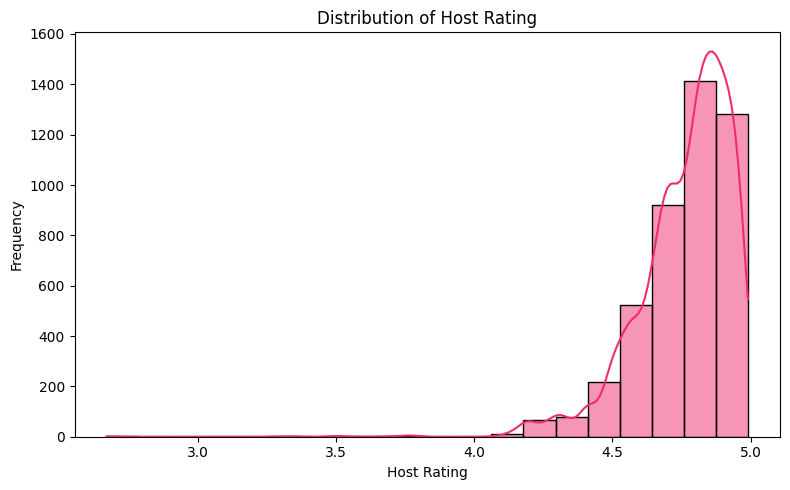

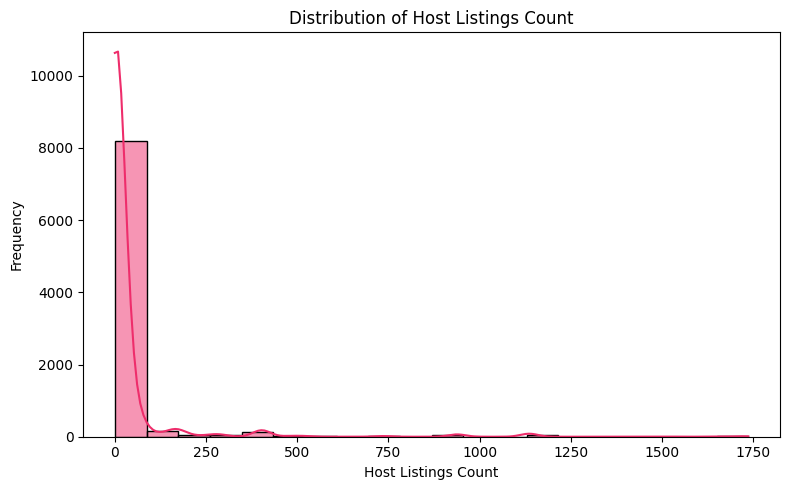

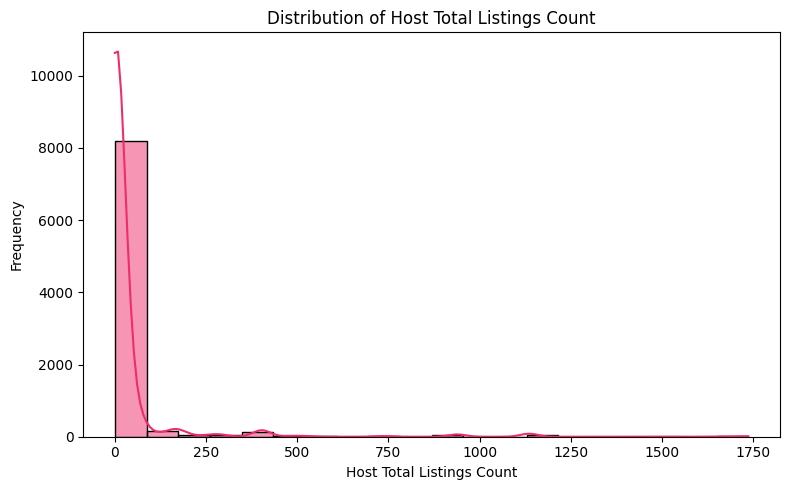

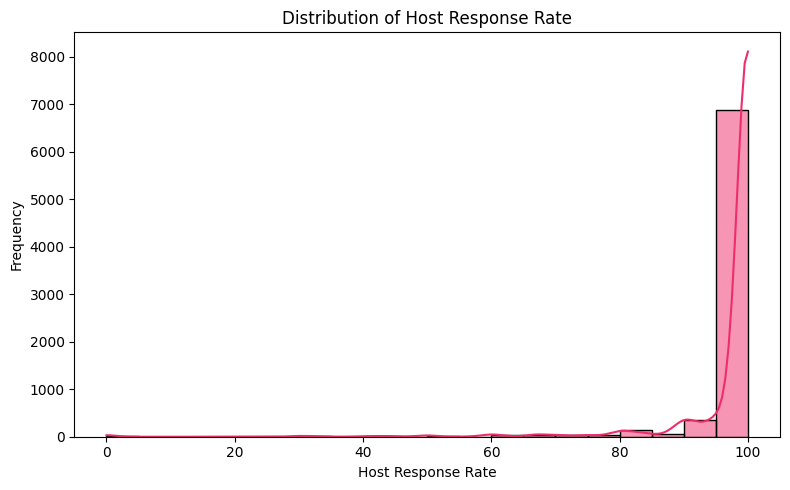

In [352]:
median_fill_columns = [
    'bathrooms', 'bedrooms', 'beds',
    'host_rating', 'host_listings_count', 'host_total_listings_count',
    'host_response_rate'
]

for col in median_fill_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True, color="#EE2D6B", edgecolor='black', bins=20)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


In [353]:
median_fill_columns = ['bathrooms', 'bedrooms', 'beds','host_rating','host_listings_count','host_total_listings_count','host_response_rate']

for col in median_fill_columns:
    df[col].fillna(df[col].median(), inplace=True)

**Handling nulls by filling it with zero**

For `security_deposit` and `cleaning_fee`, filling with `0` **made sense logically**, as the absence of a value likely indicates **no fee was required**.

In [354]:
df['security_deposit'].fillna(0,inplace=True)
df['cleaning_fee'].fillna(0,inplace=True)

**Handling nulls in text columns**

**1) Filling with Default Phrases**

 For other text fields such as `neighborhood_overview`, `notes`, `transit`, `access`, `interaction`, `house_rules`, and `host_about`, we filled missing values with default placeholders like `"No neighborhood info"` or `"No house rules"`.  
These placeholders indicate missing data without introducing misleading or artificial content, while still maintaining data consistency and structure.


In [355]:
df['neighborhood_overview'].fillna("No neighborhood info", inplace=True)
df['notes'].fillna("No notes", inplace=True)
df['transit'].fillna("No transit info", inplace=True)
df['access'].fillna("No access info", inplace=True)
df['interaction'].fillna("No interaction info", inplace=True)
df['house_rules'].fillna("No house rules", inplace=True)
df['host_about'].fillna("No host info", inplace=True)

**2) Text Generation using Cohere API**

For key descriptive fields like `space`, `description`, and `summary`, we used **Cohere's language generation capabilities** to generate meaningful replacements. This helped preserve the quality and completeness of listings where descriptive content is important.

In [356]:
# import cohere

# co = cohere.Client("juIYpQ3NwQHAyNnlwcLeCzjZGa9tHZUvgj24TL3V")

# def generate_summary(row):
#     if pd.notnull(row['summary']):
#         return row['summary']

#     prompt = f"Write a cozy and inviting one-sentence summary for a {row['bedrooms']}-bedroom place in the {row['smart_location']} with {row['amenities']}."

#     response = co.generate(
#         model='command',
#         prompt=prompt,
#         max_tokens=60,
#         temperature=0.7,
#     )

#     return response.generations[0].text.strip()

# df['summary'] = df.apply(generate_summary, axis=1)

# df.to_csv('GuestSatisfactionPrediction_Copy.csv', index=False)

In [357]:
# import cohere
# co = cohere.Client("h2W3WCDLhT6df3h4ksISWtTIqvRbPfCGAQuf07gA")

# def generate_description(row):
#     if pd.notnull(row['description']):
#         return row['description']

#     prompt = f"""Write a cozy, detailed, and inviting property description for a rental listing.
# It should describe a {row['bedrooms']}-bedroom place located in {row['smart_location']} with the following amenities: {row['amenities']}.
# Highlight features like living spaces, kitchen equipment, outdoor areas, and anything that would make a guest feel at home."""

#     response = co.generate(
#         model='command',
#         prompt=prompt,
#         max_tokens=250,
#         temperature=0.7,
#     )

#     return response.generations[0].text.strip()


# df['description'] = df.apply(generate_description, axis=1)

# df.to_csv('GuestSatisfactionPrediction_Copy.csv', index=False)


In [358]:
# import cohere
# import pandas as pd

# # Define two cohere clients with different trial keys
# co1 = cohere.Client("yFsJR6NCZmgyJ9KCc1FkjrFt0BOkIXnOnrDDY9R6")  # First API key


# def generate_summary(row):
#     if pd.notnull(row['space']):
#         return row['space']

#     prompt = f"Write a detailed and inviting description of a {row['bedrooms']}-bedroom home in the {row['neighbourhood_cleansed']} neighborhood of {row['city']}, located in {row['smart_location']}. The home features {row['amenities']}. Highlight the house's size, layout, and any special features that make it ideal for families, groups, or individuals."

#     # Try the first API key, then switch to the second if it fails

#     response = co1.generate(
#             model='command',
#             prompt=prompt,
#             max_tokens=150,
#             temperature=0.7,
#         )


#     return response.generations[0].text.strip()

# df['space'] = df.apply(generate_summary, axis=1)
# df.to_csv('GuestSatisfactionPrediction_Copy.csv', index=False)


In [359]:
df.isnull().sum()

id                                     0
listing_url                            0
name                                   0
summary                                0
space                                  0
description                            0
neighborhood_overview                  0
notes                                  0
transit                                0
access                                 0
interaction                            0
house_rules                            0
thumbnail_url                       8724
host_id                                0
host_url                               0
host_name                              0
host_since                             0
host_location                          0
host_about                             0
host_response_time                     0
host_response_rate                     0
host_acceptance_rate                8724
host_is_superhost                      0
host_neighbourhood                     0
host_listings_co

### **Flooring Columns**

For the numeric columns `bathrooms`, `bedrooms`, and `beds`, we applied a floor operation to round down the values as fractional values for those columns don't have meaningful interpretations.

In [360]:
numeric_columns = ['bathrooms', 'bedrooms', 'beds']

for col in numeric_columns:
    df[col] = np.floor(df[col]).astype(int)

### **Text Processing**

#### **1) Text Cleaning**  

In [361]:
df['summary'].iloc[8722]

'Luxury single family home near I-5 Freeway and Highway 52, just 2 miles east of La Jolla Shores Beach, shops, restaurants, 2 miles north of Pacific Beach, easy access to all by car. HVAC, solar powered pool, basketball net, gas fire pit for cozy conversations and your own private bedroom.'

In [362]:
text_columns = ['summary', 'space', 'description','notes', 'transit', 'access', 'house_rules']
for col in text_columns:
    df[col] = (
        df[col]
        .str.lower() # lowercasing
        .str.replace(r"http\S+|www\S+|[\w\.-]+@[\w\.-]+", "", regex=True)  # remove URLs & emails
        .str.replace(r"<.*?>", "", regex=True)  # remove HTML tags
        .str.replace(r"[^a-zA-Z0-9\s]", "", regex=True)  # remove punctuation & special chars
        .str.replace(r"\s+", " ", regex=True)  # collapse multiple spaces
        .str.strip()  # trim leading/trailing spaces
    )


In [363]:
df['summary'].iloc[8722]

'luxury single family home near i5 freeway and highway 52 just 2 miles east of la jolla shores beach shops restaurants 2 miles north of pacific beach easy access to all by car hvac solar powered pool basketball net gas fire pit for cozy conversations and your own private bedroom'

#### **2) Handling Contractions**  

In [364]:
contractions_dict = {
    "isn’t": " is not",
    "don’t": " do not",
    "aren’t": " are not",
    "can’t": " cannot",
    "couldn’t": " could not",
    "didn’t": " did not",
    "’ve": " have",
    "’d": " would",
    "u": " you",
    "’m": " am",
    "’ll":" will",
    "’re": " are",
    "won’t": " will not"

}

def expand_contractions(text):
    for contraction, expansion in contractions_dict.items():
        text = re.sub(r'\b' + re.escape(contraction) + r'\b', expansion, text)
    return text

text_columns = ['summary', 'space', 'description','notes', 'transit', 'access', 'house_rules']
for col in text_columns:
    df[col] = df[col].apply(expand_contractions)

In [365]:
df['summary'].iloc[8722]

'luxury single family home near i5 freeway and highway 52 just 2 miles east of la jolla shores beach shops restaurants 2 miles north of pacific beach easy access to all by car hvac solar powered pool basketball net gas fire pit for cozy conversations and your own private bedroom'

#### **3) Tokenization** 

In [366]:
from nltk.tokenize import word_tokenize

text_columns = ['summary', 'space', 'description','notes', 'transit', 'access', 'house_rules']
for col in text_columns:
    df[col] = df[col].apply(word_tokenize)

#### **4) Removing Stop words** 

In [367]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stop_words(tokens):
    return [word for word in tokens if word not in stop_words]

text_columns = ['summary', 'space', 'description','notes', 'transit', 'access', 'house_rules']
for col in text_columns:
    df[col] = df[col].apply(remove_stop_words)

In [368]:
df.iloc[:5,5].to_frame()

,description
0,"[beautiful, 2, bedroom, 2, bathroom, furnished..."
1,"[feel, house, great, place, family, relax, unw..."
2,"[zen, luxury, best, location, americas, finest..."
3,"[start, day, breakfast, sunny, patio, overlook..."
4,"[2, bedroom1, bathroom, beachside, unit, locat..."


#### **5) Lemmatization** 

In [369]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemma(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

text_columns = ['summary', 'space', 'description','notes', 'transit', 'access', 'house_rules']

for col in text_columns:
    df[col] = df[col].apply(lemma)

In [370]:
df.iloc[:5,3].to_frame()

,summary
0,"[beautiful, 2, bedroom, 2, bathroom, furnished..."
1,"[feel, house, great, place, family, relax, unw..."
2,"[zen, luxury, best, location, america, finest,..."
3,"[start, day, breakfast, sunny, patio, overlook..."
4,"[2, bedroom1, bathroom, beachside, unit, locat..."


#### **6) Text Vectorization using Tfidf** 

In [371]:
from sklearn.feature_extraction.text import TfidfVectorizer


df['summary'] = df['summary'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df['space'] = df['space'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df['description'] = df['description'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df['notes'] = df['notes'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df['transit'] = df['transit'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df['access'] = df['access'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df['house_rules'] = df['house_rules'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [372]:
# summary
summary_tfidf = TfidfVectorizer(max_features=1000)
summary_features = summary_tfidf.fit_transform(df['summary'])
summary_tfidf_df = pd.DataFrame(summary_features.toarray(), columns=[f"summary_{f}" for f in summary_tfidf.get_feature_names_out()])

# space
space_tfidf = TfidfVectorizer(max_features=1000)
space_features = space_tfidf.fit_transform(df['space'])
space_tfidf_df = pd.DataFrame(space_features.toarray(), columns=[f"space_{f}" for f in space_tfidf.get_feature_names_out()])


# description
description_tfidf = TfidfVectorizer(max_features=1000)
description_features = description_tfidf.fit_transform(df['description'])
description_tfidf_df = pd.DataFrame(description_features.toarray(), columns=[f"description_{f}" for f in description_tfidf.get_feature_names_out()])

# notes
notes_tfidf = TfidfVectorizer(max_features=1000)
notes_features = notes_tfidf.fit_transform(df['notes'])
notes_tfidf_df = pd.DataFrame(notes_features.toarray(), columns=[f"notes_{f}" for f in notes_tfidf.get_feature_names_out()])


# transit
transit_tfidf = TfidfVectorizer(max_features=1000)
transit_features = transit_tfidf.fit_transform(df['transit'])
transit_tfidf_df = pd.DataFrame(transit_features.toarray(), columns=[f"transit_{f}" for f in transit_tfidf.get_feature_names_out()])


# access
access_tfidf = TfidfVectorizer(max_features=1000)
access_features = access_tfidf.fit_transform(df['access'])
access_tfidf_df = pd.DataFrame(access_features.toarray(), columns=[f"access_{f}" for f in access_tfidf.get_feature_names_out()])


# house_rules
house_rules_tfidf = TfidfVectorizer(max_features=1000)
house_rules_features = house_rules_tfidf.fit_transform(df['house_rules'])
house_rules_tfidf_df = pd.DataFrame(house_rules_features.toarray(), columns=[f"house_rules_{f}" for f in house_rules_tfidf.get_feature_names_out()])


#### **7) Dimensionality Reduction using SVD** 

In [373]:
from sklearn.decomposition import TruncatedSVD

svd_summary = TruncatedSVD(n_components=35, random_state=0)
svd_space = TruncatedSVD(n_components=35, random_state=0)
svd_transit = TruncatedSVD(n_components=35, random_state=0)
svd_access = TruncatedSVD(n_components=35, random_state=0)
svd_description = TruncatedSVD(n_components=35, random_state=0)
svd_notes = TruncatedSVD(n_components=35, random_state=0)
svd_house_rules = TruncatedSVD(n_components=35, random_state=0)

In [374]:
summary_svd_df = pd.DataFrame(svd_summary.fit_transform(summary_features), columns=[f"summary_svd_{i}" for i in range(35)])
space_svd_df = pd.DataFrame(svd_space.fit_transform(space_features), columns=[f"space_svd_{i}" for i in range(35)])
transit_svd_df = pd.DataFrame(svd_transit.fit_transform(transit_features), columns=[f"transit_svd_{i}" for i in range(35)])
access_svd_df = pd.DataFrame(svd_access.fit_transform(access_features), columns=[f"access_svd_{i}" for i in range(35)])
description_svd_df = pd.DataFrame(svd_description.fit_transform(description_features), columns=[f"description_svd_{i}" for i in range(35)])
notes_svd_df = pd.DataFrame(svd_notes.fit_transform(notes_features), columns=[f"notes_svd_{i}" for i in range(35)])
house_rules_svd_df = pd.DataFrame(svd_house_rules.fit_transform(house_rules_features), columns=[f"house_rules_svd_{i}" for i in range(35)])


In [375]:
df.reset_index(drop=True, inplace=True)
df = pd.concat([
    df,
    summary_svd_df,
    space_svd_df,
    transit_svd_df,
    access_svd_df,
    description_svd_df,
    notes_svd_df,
    house_rules_svd_df
], axis=1)

In [376]:
df.shape

(8724, 316)

### **Sentiment Analysis**

`Calculating sentiment score using TextBlob`

In [377]:
from textblob import TextBlob
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

for column in ['interaction','host_about','neighborhood_overview','name']:
    df[column] = df[column].apply(get_sentiment)

df[['interaction','host_about','neighborhood_overview','name']].head(5)

,interaction,host_about,neighborhood_overview,name
0,0.0700,0.000000,0.000000,0.0000
1,0.1375,0.250000,0.163333,0.0000
2,0.5000,0.341473,0.308102,0.0000
3,0.4000,0.000000,0.290625,-0.1875
4,-0.0500,0.175000,0.148760,0.0000


### **Standardizing Short Text Columns**

In [378]:
columns_to_standardize = [
    'host_name', 'host_location', 'host_neighbourhood',
    'street', 'neighbourhood', 'neighbourhood_cleansed',
    'city', 'state', 'market', 'smart_location', 'country_code','country','property_type','room_type'
]
for col in columns_to_standardize:
    df[col] = df[col].str.lower().str.strip()

### **Encoding**

#### **Label Encoder**

In [379]:
label_encoders = {}

columns_to_encode = [
    'host_neighbourhood', 'street', 'neighbourhood', 'neighbourhood_cleansed',
    'city', 'state', 'market', 'smart_location', 'country_code', 'country',
    'property_type', 'room_type', 'host_name'
]

for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le     



#### **Binary Mapping of Boolean Columns**

In [380]:
columns_to_map = [
    'host_has_profile_pic', 'host_identity_verified', 'is_location_exact',
    'requires_license', 'instant_bookable', 'is_business_travel_ready',
    'require_guest_phone_verification', 'host_is_superhost'
]
mapping_dict = {'t': 1, 'f': 0}
for col in columns_to_map:
    df[col] = df[col].map(mapping_dict)

the `require_guest_profile_picture` column is transformed by reversing the typical boolean mapping, where `'t'` (true) is mapped to `0` and `'f'` (false) is mapped to `1`. This reversed mapping was chosen because we found it better **not to ask for a guest profile picture**

In [381]:
df['require_guest_profile_picture'] = df['require_guest_profile_picture'].map({'t': 0, 'f': 1})


#### **Mapping Categorical Data to Numeric Values with Rank (Higher is Better)**

In [382]:
response_mapping = {
    'within an hour': 3,
    'within a few hours': 2,
    'within a day': 1,
    'a few days or more': 0
}
df['host_response_time'] = df['host_response_time'].map(response_mapping)


In [383]:
bed_rank = {
    'Airbed': 0,
    'Couch': 1,
    'Futon': 2,
    'Pull-out Sofa': 3,
    'Real Bed': 4
}

df['bed_type'] = df['bed_type'].map(bed_rank)


In [384]:
cancellation_rank = {
    'flexible': 5,
    'moderate': 4,
    'strict': 3,
    'strict_14_with_grace_period': 2,
    'super_strict_30': 1,
    'super_strict_60': 0
}

df['cancellation_policy'] = df['cancellation_policy'].map(cancellation_rank)


### **Handling Outliers using IQR method**

In [385]:
outliers_cols = [
    'host_total_listings_count','host_listings_count',
    "latitude", "longitude",
    "accommodates", "bathrooms", "bedrooms", "beds",
    "guests_included", "minimum_nights",
    "maximum_nights", "number_of_reviews", "number_of_stays",'review_scores_rating'
]


In [386]:
for col in outliers_cols:
  q1 = np.percentile(df[col], 25)
  q3 = np.percentile(df[col], 75)
  norm_range = (q3 - q1) * 1.5
  lower_outliers = df[df[col] < (q1 - norm_range)]
  upper_outliers = df[df[col] > (q3 + norm_range)]
  outliers = len(lower_outliers)+len(upper_outliers)
  print(f"The number of outliers in {col} is : {outliers}")

The number of outliers in host_total_listings_count is : 1301
The number of outliers in host_listings_count is : 1301
The number of outliers in latitude is : 521
The number of outliers in longitude is : 46
The number of outliers in accommodates is : 179
The number of outliers in bathrooms is : 219
The number of outliers in bedrooms is : 627
The number of outliers in beds is : 317
The number of outliers in guests_included is : 504
The number of outliers in minimum_nights is : 629
The number of outliers in maximum_nights is : 4
The number of outliers in number_of_reviews is : 755
The number of outliers in number_of_stays is : 755
The number of outliers in review_scores_rating is : 475


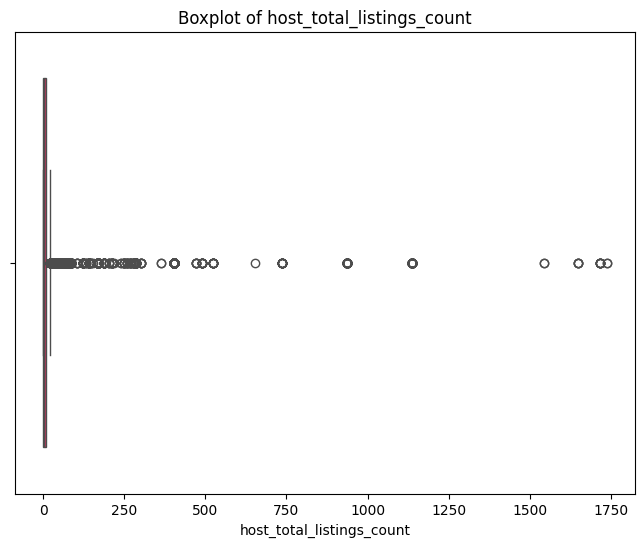

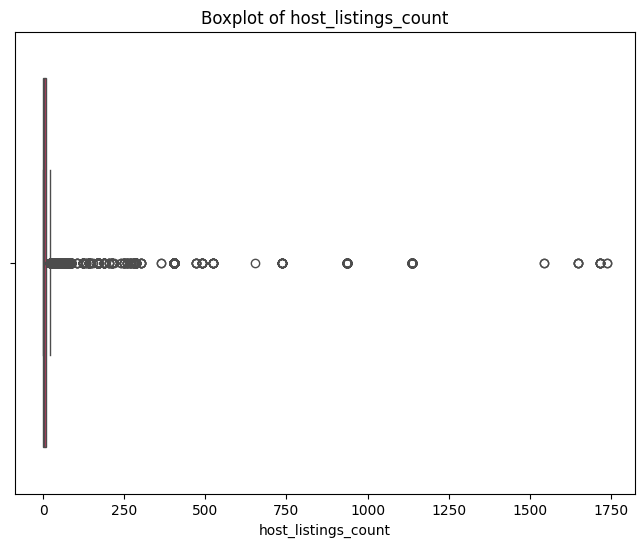

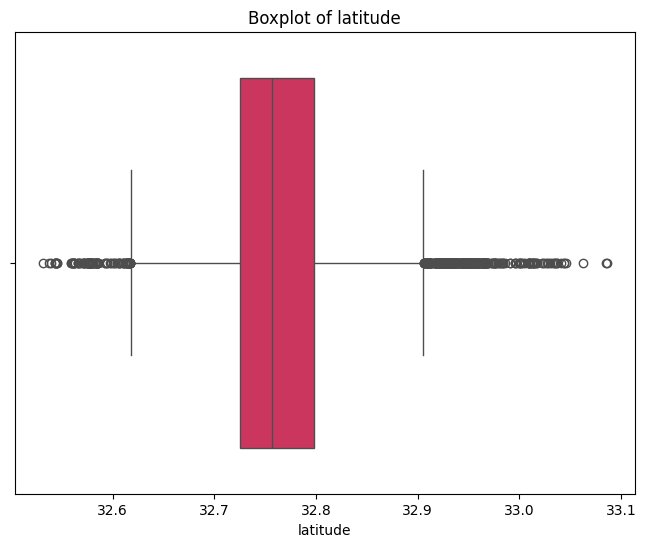

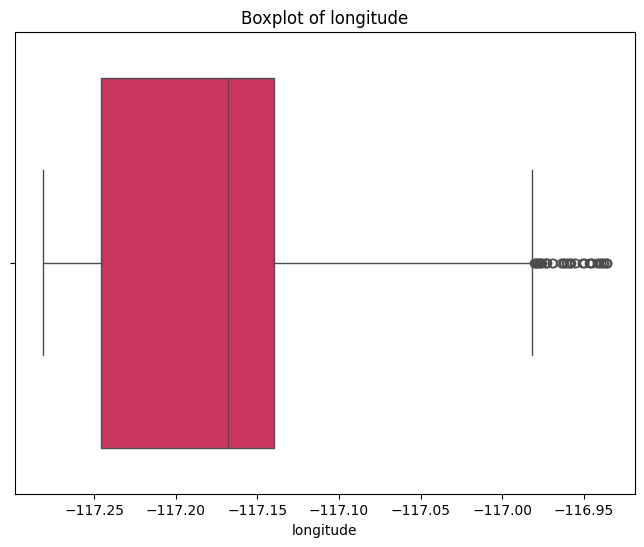

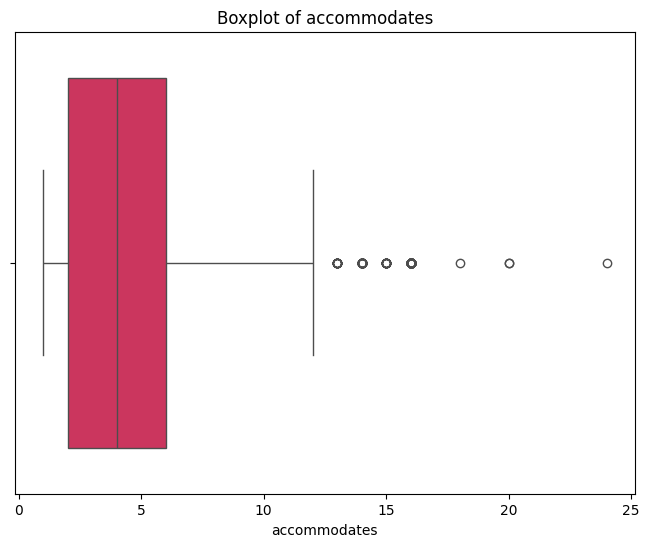

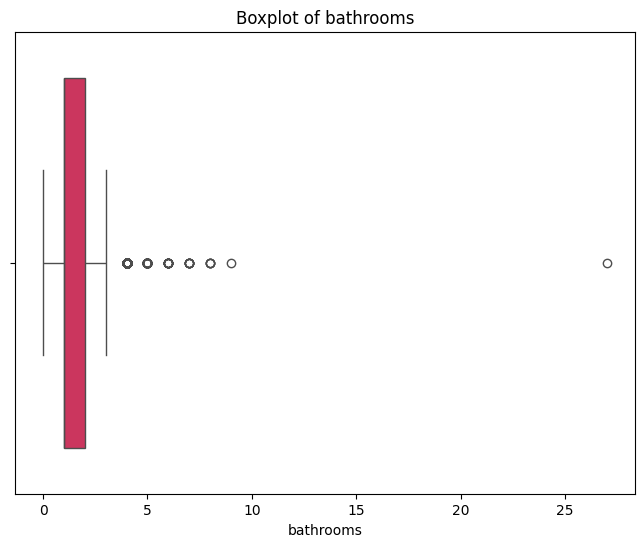

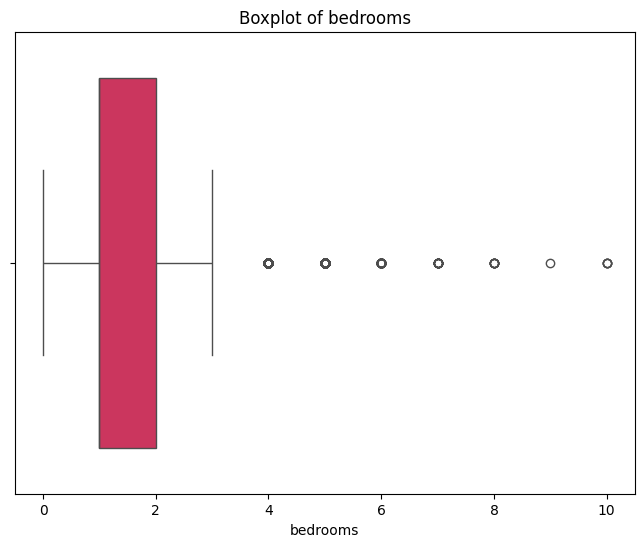

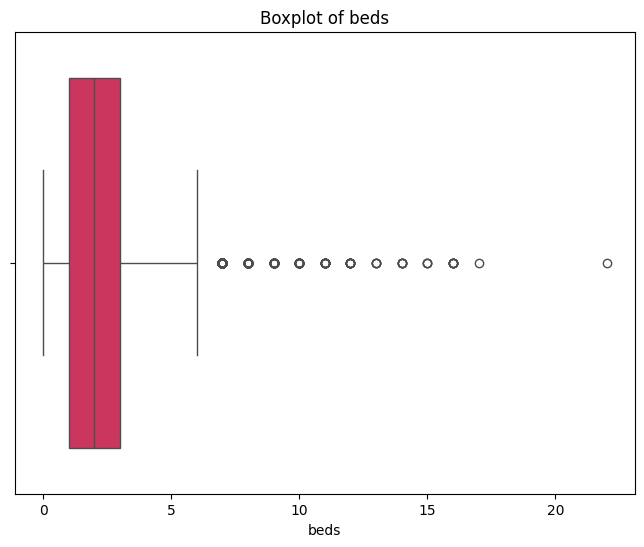

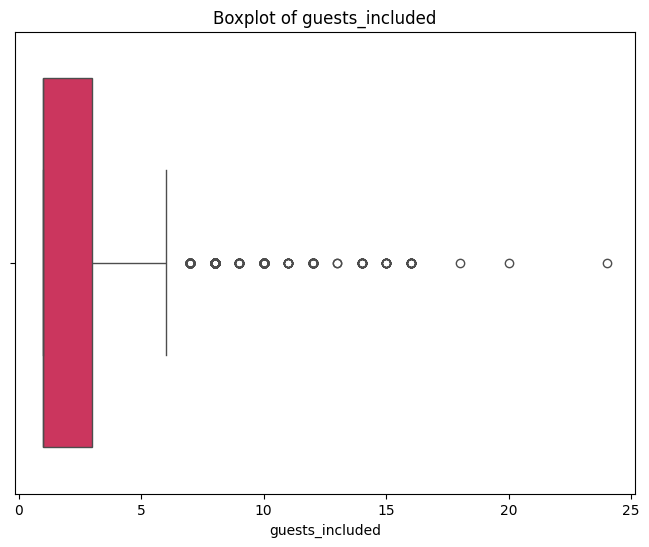

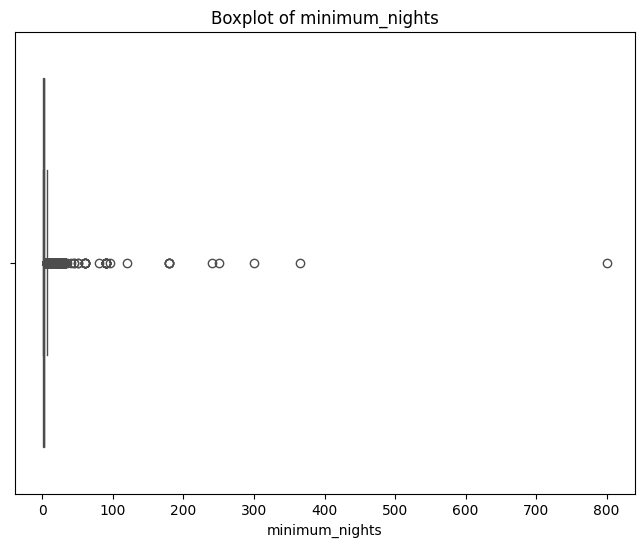

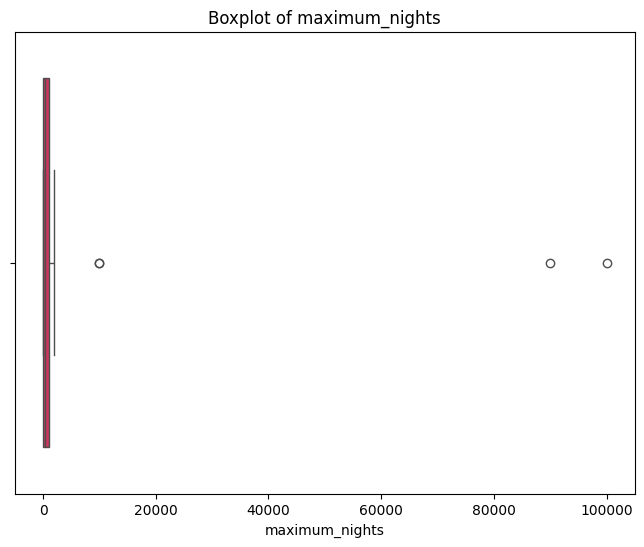

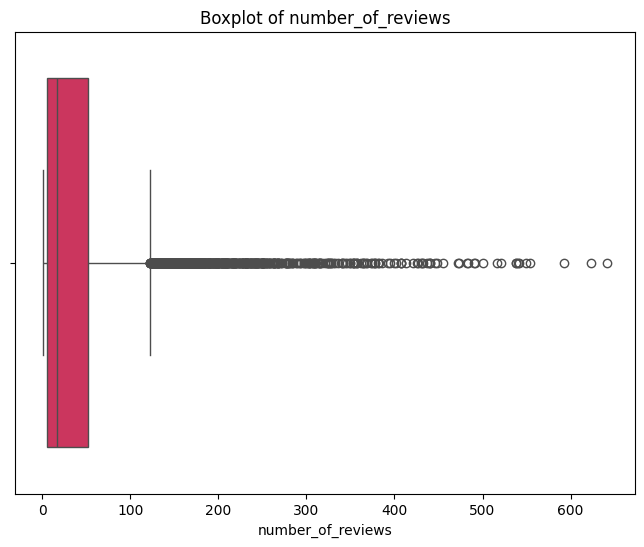

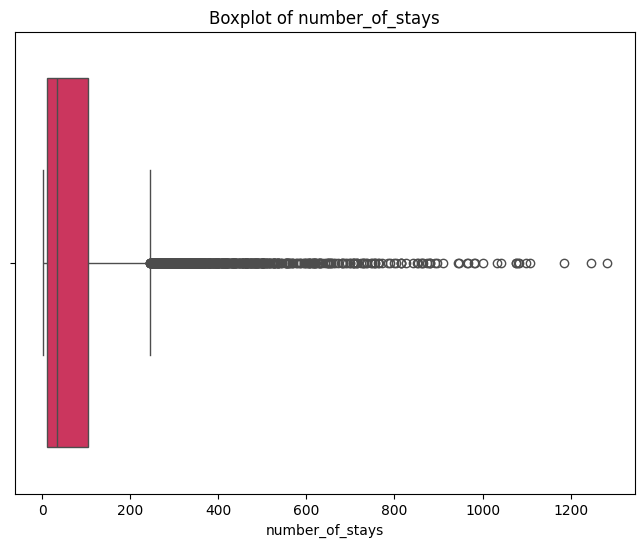

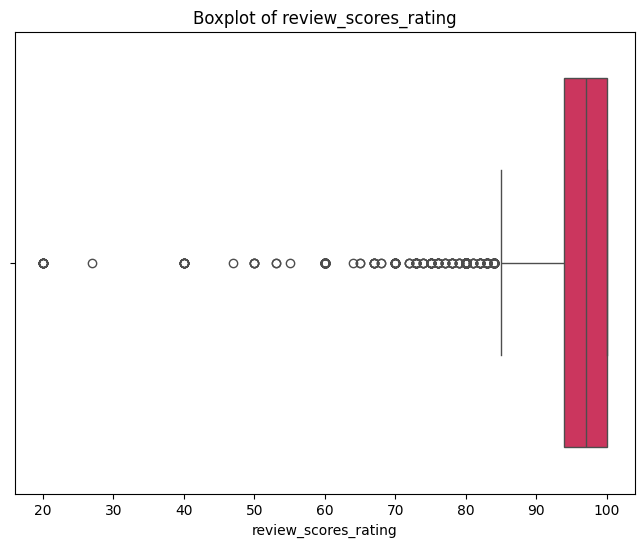

In [387]:
for col in outliers_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[col], palette=["#E41D53"])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [388]:
for col in outliers_cols:
  q1 = np.percentile(df[col], 25)
  q3 = np.percentile(df[col], 75)
  norm_range = (q3 - q1) * 1.5
  df[col] = np.where(df[col] < (q1 - norm_range), q1 - norm_range, df[col])
  df[col] = np.where(df[col] > (q3 + norm_range), q3 + norm_range, df[col])

In [389]:
for col in outliers_cols:
  q1 = np.percentile(df[col], 25)
  q3 = np.percentile(df[col], 75)
  norm_range = (q3 - q1) * 1.5
  lower_outliers = df[df[col] < (q1 - norm_range)]
  upper_outliers = df[df[col] > (q3 + norm_range)]
  outliers = len(lower_outliers)+len(upper_outliers)
  print(f"The number of outliers in {col} is : {outliers}")

The number of outliers in host_total_listings_count is : 0
The number of outliers in host_listings_count is : 0
The number of outliers in latitude is : 0
The number of outliers in longitude is : 0
The number of outliers in accommodates is : 0
The number of outliers in bathrooms is : 0
The number of outliers in bedrooms is : 0
The number of outliers in beds is : 0
The number of outliers in guests_included is : 0
The number of outliers in minimum_nights is : 0
The number of outliers in maximum_nights is : 0
The number of outliers in number_of_reviews is : 0
The number of outliers in number_of_stays is : 0
The number of outliers in review_scores_rating is : 0


## **Feature Engineering**

### **Web Scraping**

#### **Using Beautiful Soup**

We extracted host ratings from `host_url` column and stores the ratings in the `host_rating` column of and saved it in main csv file

In [390]:
# import requests
# from bs4 import BeautifulSoup
# import re
# import pandas as pd

# # Let's assume df is already loaded with the 'host_url' column

# def get_host_rating_with_progress(url, idx, total):
#     try:
#         headers = {
#             'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'
#         }
#         response = requests.get(url, headers=headers, timeout=10)

#         if response.status_code != 200:
#             print(f"[{idx}/{total}] ❌ Failed to access {url}")
#             return None

#         soup = BeautifulSoup(response.content, 'html.parser')

#         rating_span = soup.find('span', string=re.compile(r'(\d+\.\d+)\s+Rating'))

#         if rating_span:
#             rating_text = rating_span.get_text()
#             match = re.search(r'\d+\.\d+', rating_text)
#             if match:
#                 rating_value = float(match.group())
#                 print(f"[{idx}/{total}] ✅ Found rating {rating_value} for {url}")
#                 return rating_value
#             else:
#                 print(f"[{idx}/{total}] ❌ Rating format mismatch for {url}")
#         else:
#             print(f"[{idx}/{total}] ❌ Rating not found for {url}")

#         return None

#     except Exception as e:
#         print(f"[{idx}/{total}] ⚠️ Error scraping {url}: {e}")
#         return None

# # Apply function with index tracking
# total_urls = len(df)
# df['host_rating'] = [
#     get_host_rating_with_progress(url, idx+1, total_urls)
#     for idx, url in enumerate(df['host_url'])
# ]

# output_file = "GuestSatisfactionPrediction.csv"
# df.to_csv(output_file, index=False)

# print(f"✅ Updated data saved to {output_file}")



#### **Using Selenium**

We extracted guest favourite labels from `listing_url` column and stores the ratings in the `guest_favorite` column of and saved it in main csv file

In [391]:
# from selenium import webdriver
# from selenium.webdriver.chrome.options import Options
# from selenium.webdriver.common.by import By
# import pandas as pd
# import time

# # Setup headless Chrome
# options = Options()
# options.add_argument("--headless")
# options.add_argument("--no-sandbox")
# options.add_argument("--disable-dev-shm-usage")

# driver = webdriver.Chrome(options=options)

# def has_guest_favorite(url, idx, total):
#     try:
#         driver.get(url)
#         time.sleep(3)


#         try:
#             driver.find_element(By.CSS_SELECTOR, "[data-section-id='TITLE_DEFAULT']")
#             listing_page = True
#         except:
#             listing_page = False

#         if not listing_page:
#             print(f"[{idx}/{total}] ⚠️ Not a listing page (likely redirected to homepage) for {url}")
#             return 0

#         # Now check for Guest favorite
#         try:
#             guest_fav = driver.find_element(By.XPATH, "//div[contains(text(),'Guest favorite')]")
#             print(f"[{idx}/{total}] ✅ 'Guest favorite' FOUND for {url}")
#             return 1
#         except:
#             print(f"[{idx}/{total}] ❌ 'Guest favorite' NOT FOUND for {url}")
#             return 0

#     except Exception as e:
#         print(f"[{idx}/{total}] ⚠️ Error scraping {url}: {e}")
#         return None

# # Apply function with index tracking
# total_urls = len(df)
# df['guest_favorite'] = [
#     has_guest_favorite(url, idx+1, total_urls)
#     for idx, url in enumerate(df['listing_url'])
# ]

# driver.quit()

# output_file = "GuestSatisfactionPrediction.csv"
# df.to_csv(output_file, index=False)

# print(f"✅ Updated data saved to {output_file}")


### **Dividing amenities into categories**

We cleaned and parsed the `amenities` column, extracted all individual items, and grouped them into meaningful categories (e.g., Essentials, Safety, Luxury). For each listing, we counted how many amenities belong to each category and added these counts as new features to the dataset.

In [392]:
all_amenities = set()

for amenities in df['amenities']:
    amenities = amenities.strip()
    if amenities.startswith("{") and amenities.endswith("}"):
        amenities = amenities[1:-1] 

    items = [item.strip().strip('"').strip("'") for item in amenities.split(",")]
    all_amenities.update(items)

for amenity in sorted(all_amenities):
    print(amenity)


24-hour check-in
Accessible-height bed
Accessible-height toilet
Air conditioning
Air purifier
Alfresco bathtub
Amazon Echo
BBQ grill
Baby bath
Baby monitor
Babysitter recommendations
Balcony
Bath towel
Bathroom essentials
Bathtub
Bathtub with bath chair
Beach essentials
Beach view
Beachfront
Bed linens
Bedroom comforts
Bidet
Body soap
Breakfast
Breakfast table
Building staff
Buzzer/wireless intercom
Cable TV
Carbon monoxide detector
Cat(s)
Ceiling fan
Central air conditioning
Changing table
Children’s books and toys
Children’s dinnerware
Cleaning before checkout
Coffee maker
Convection oven
Cooking basics
Crib
DVD player
Day bed
Disabled parking spot
Dishes and silverware
Dishwasher
Dog(s)
Doorman
Double oven
Dryer
EV charger
Electric profiling bed
Elevator
En suite bathroom
Espresso machine
Essentials
Ethernet connection
Exercise equipment
Extra pillows and blankets
Extra space around bed
Family/kid friendly
Fax machine
Fire extinguisher
Fire pit
Fireplace guards
Firm mattress
First 

In [393]:
amenities_dict = {
    "Essentials": [
        "Essentials", "Bath towel", "Bathroom essentials", "Bed linens", "Bedroom comforts",
        "Body soap", "Cooking basics", "Dishes and silverware", "Hangers", "Heating",
        "Hot water", "Internet", "Shampoo", "Toilet paper", "Wifi", "TV", "Cleaning before checkout",
        "Ethernet connection", "Hair dryer", "Hot water kettle", "toilet"
    ],
    "Safety": [
        "Carbon monoxide detector", "Fire extinguisher", "First aid kit", "Safety card",
        "Smoke detector", "Window guards", "Buzzer/wireless intercom",
        "Lock on bedroom door", "Doorman", "Smart lock", "Keypad", "Fireplace guards"
    ],
    "Luxury": [
        "Air purifier", "Alfresco bathtub", "En suite bathroom", "Espresso machine", "Firm mattress",
        "Heated floors", "Heated towel rack", "Hot tub", "Jetted tub", "Memory foam mattress",
        "Pillow-top mattress", "Private hot tub", "Private pool", "Rain shower", "Sauna",
        "Soaking tub", "Sound system", "Stand alone steam shower", "Sun loungers", "Wine cooler",
        "Building staff", "Day bed", "Host greets you", "Indoor fireplace", "Luggage dropoff allowed",
        "Private bathroom", "Private entrance", "Private living room", "Room-darkening shades",
        "Suitable for events", "Ski-in/Ski-out", "Smoking allowed"
    ],
    "Accessibility": [
        "24-hour check-in", "Accessible-height bed", "Accessible-height toilet", "Disabled parking spot",
        "Electric profiling bed", "Elevator", "Extra space around bed", "Flat path to guest entrance",
        "Ground floor access", "Handheld shower head", "No stairs or steps to enter",
        "Pool with pool hoist", "Roll-in shower", "Shower chair", "Single level home",
        "Well-lit path to entrance", "Wheelchair accessible", "Wide clearance to shower",
        "Wide doorway to guest bathroom", "Wide entrance", "Wide entrance for guests",
        "Wide entryway", "Wide hallways", "Fixed grab bars for shower", "Fixed grab bars for toilet",
        "Bathtub with bath chair"
    ],
    "Outdoor": [
        "BBQ grill", "Balcony", "Beach essentials", "Beach view", "Beachfront",
        "Free parking on premises", "Free street parking", "Garden or backyard", "Hammock",
        "Lake access", "Mountain view", "Outdoor kitchen", "Outdoor parking",
        "Outdoor seating", "Patio or balcony", "Terrace", "Waterfront", "Tennis court",
        "Pool", "Pool toys", "Fire pit"
    ],
    "Child & Family-Friendly": [
        "Baby bath", "Baby monitor", "Babysitter recommendations", "Changing table",
        "Children's books and toys", "Children's dinnerware", "Crib", "Family/kid friendly",
        "High chair", "Outlet covers", "Pack 'n Play/travel crib", "Stair gates",
        "Table corner guards", "Other pet(s)", "Pets allowed", "Cat(s)", "Dog(s)", "Pets live on this property"
    ],
    "Entertainment": [
        "Amazon Echo", "Cable TV", "DVD player", "Game console", "HBO GO",
        "Netflix", "Projector and screen", "Smart TV"
    ],
    "Home Appliances": [
        "Air conditioning", "Ceiling fan", "Central air conditioning", "Coffee maker",
        "Convection oven", "Dishwasher", "Dryer", "EV charger", "Exercise equipment",
        "Fax machine", "Full kitchen", "Gas oven", "Gym", "High-resolution computer monitor",
        "Kitchen", "Kitchenette", "Laptop friendly workspace", "Lockbox", "Long term stays allowed",
        "Microwave", "Mini fridge", "Murphy bed", "Oven", "Paid parking off premises",
        "Paid parking on premises", "Printer", "Refrigerator", "Stove", "Washer",
        "Warming drawer", "Pocket wifi", "Shared gym", "Shared hot tub", "Shared pool",
        "Self check-in", "Extra pillows and blankets", "Formal dining area", "Standing valet",
        "Iron", "Double oven", "Heat lamps", "Breakfast", "Breakfast table", "Bidet"
    ]
}


In [394]:
amenity_to_category = {}
for category, amenities in amenities_dict.items():
    for amenity in amenities:
        amenity_to_category[amenity] = category

all_categories = list(amenities_dict.keys())

In [395]:
from collections import defaultdict
def categorize_amenities(amenities_str):
    if pd.isna(amenities_str):
        amenities = []
    else:
        amenities_str = amenities_str.strip()
        if amenities_str.startswith("{") and amenities_str.endswith("}"):
            amenities_str = amenities_str[1:-1] 
        amenities = [item.strip().strip('"').strip("'") for item in amenities_str.split(",")]

    counts = defaultdict(int)
    for amenity in amenities:
        if amenity:  
            category = amenity_to_category.get(amenity)
            if category:
                counts[category] += 1

    full_counts = {cat: counts.get(cat, 0) for cat in all_categories}
    return pd.Series(full_counts)

In [396]:
category_counts_df = df["amenities"].apply(categorize_amenities)

df = pd.concat([df, category_counts_df], axis=1)

In [397]:
df[['amenities','Essentials','Safety','Luxury','Accessibility','Outdoor','Child & Family-Friendly','Entertainment','Home Appliances']].head(5)

,amenities,Essentials,Safety,Luxury,Accessibility,Outdoor,Child & Family-Friendly,Entertainment,Home Appliances
0,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",6,3,2,1,2,0,0,7
1,"{TV,""Cable TV"",Wifi,Kitchen,""Free parking on p...",9,4,1,1,5,1,1,10
2,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",11,3,2,0,5,2,0,13
3,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",16,4,0,1,2,1,0,16
4,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",11,7,2,2,4,1,0,17


In [398]:
df.shape

(8724, 324)

### **Extracting New features from date columns**

**Extracting number of active years from host since column**

In [399]:
from datetime import datetime

df['host_since'] = pd.to_datetime(df['host_since'], format='%m/%d/%Y')

today = pd.to_datetime(datetime.today())
df['years_active'] = (today - df['host_since']).dt.days / 365

df['years_active'] = df['years_active'].round(1)

df[['years_active','host_since']].head()



,years_active,host_since
0,12.6,2012-10-15
1,12.3,2013-01-29
2,11.5,2013-11-05
3,7.1,2018-04-11
4,11.7,2013-08-23


**Extracting review frequency per day from last_review,first_review and number_of_reviews columns**

In [400]:
df['first_review'] = pd.to_datetime(df['first_review'], format='%m/%d/%Y')
df['last_review'] = pd.to_datetime(df['last_review'], format='%m/%d/%Y')

df['reviews_per_day'] = df.apply(
    lambda row: row['number_of_reviews'] / ((row['last_review'] - row['first_review']).days)
    if (row['last_review'] - row['first_review']).days != 0 else 0,
    axis=1
)

df['reviews_per_day'] = df['reviews_per_day'].round(4)

df[['reviews_per_day', 'first_review', 'last_review', 'number_of_reviews']].head()


,reviews_per_day,first_review,last_review,number_of_reviews
0,0.0000,2017-11-17,2017-11-17,1.0
1,0.0059,2013-08-02,2019-07-31,13.0
2,0.1176,2017-07-23,2019-07-16,85.0
3,0.2309,2018-05-01,2019-08-03,106.0
4,0.0000,2019-06-30,2019-06-30,1.0


### **Dividing host location column into host city , host state and host country**

In [401]:
df['host_location'].unique()

array(['san diego, california, united states', 'us',
       'brawley, california, united states',
       'seattle, washington, united states',
       'los angeles, california, united states',
       'salt lake city, utah, united states',
       'laguna niguel, california, united states',
       'lemon grove, california, united states',
       'california, united states',
       'jersey city, new jersey, united states',
       'san francisco, california, united states',
       'colorado, united states', 'henderson, nevada, united states',
       'chula vista, california, united states',
       'west hollywood, california, united states',
       'del mar, california, united states',
       'new rochelle, new york, united states',
       'new york, new york, united states',
       'denver, colorado, united states',
       'san antonio, texas, united states', 'united states',
       'arlington, texas, united states',
       'new orleans, louisiana, united states',
       'spring valley, ca

In [402]:
def split_host_location(location):

    if location in ['us', 'ca', 'at', 'gb', 'mx', 'it', 'de', 'canada', 'china', 'mexico', 'southern california']:
        return (np.nan, np.nan, location)

    if len(location.split(',')) < 1 or len(location.split(',')) > 4:
        return (np.nan, np.nan, np.nan)

    parts = [p.strip() for p in location.split(',')]

    if len(parts) == 3:
        city, state, country = parts
    elif len(parts) == 2:
        city = np.nan
        state, country = parts
    elif len(parts) == 1:
        city = np.nan
        state = np.nan
        country = parts[0]
    else:
        city = np.nan
        state = np.nan
        country = np.nan

    return (city, state, country)

df[['host_city', 'host_state', 'host_country']] = df['host_location'].apply(split_host_location).apply(pd.Series)

df[['host_location', 'host_city', 'host_state', 'host_country']].head()


,host_location,host_city,host_state,host_country
0,"san diego, california, united states",san diego,california,united states
1,"san diego, california, united states",san diego,california,united states
2,"san diego, california, united states",san diego,california,united states
3,us,NaN,NaN,us
4,"san diego, california, united states",san diego,california,united states


In [403]:
le = LabelEncoder()
columns_to_encode = ['host_city', 'host_state', 'host_country']

for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

df[['host_location', 'host_city', 'host_state', 'host_country']].head()

,host_location,host_city,host_state,host_country
0,"san diego, california, united states",205,10,36
1,"san diego, california, united states",205,10,36
2,"san diego, california, united states",205,10,36
3,us,266,68,37
4,"san diego, california, united states",205,10,36


### **Calculating Total cost from price per stay, cleaning fee and security deposit columns**

In [404]:
df['total_cost'] = (
    df['price_per_stay'] +
    df['cleaning_fee'] +
    df['security_deposit']
)
df[['price_per_stay', 'cleaning_fee', 'security_deposit','total_cost']].head()

,price_per_stay,cleaning_fee,security_deposit,total_cost
0,200.0,50.0,0.0,250.0
1,604.0,100.0,100.0,804.0
2,119.0,90.0,200.0,409.0
3,238.0,75.0,0.0,313.0
4,550.0,165.0,800.0,1515.0


## **Feature Selection**

### **Dropping Unnecessary Columns**

####  Reason for Dropping Specific Columns

We dropped the following columns because they were either redundant, not useful for modeling, or already transformed into more meaningful features:

- **id, listing_url,host_url**: These are identifiers or URLs. The `id` is a unique identifier, while `listing_url` and `host_url` were used temporarily for web scraping guest favourite and host ratings. These features were no longer necessary after the data was processed.
- **'summary', 'space', 'transit', 'access', 'description', 'notes', 'house_rules'**: These are long text fields. We already extracted useful information from them using TF-IDF , so keeping the raw text was unnecessary.
- **'thumbnail_url', 'host_acceptance_rate'**: These columns were entirely null and provided no usable information.
- **'host_since'**: We extracted features like host experience in years, so we no longer needed the raw date.
- **'host_location'**: The location is already split into structured features like `host_country`,`host_city` and `host_state`
- **'host_listings_count'**: This was replaced by `host_total_listings_count`, which gives a more complete view.
- **'amenities'**: The original text field was parsed and transformed into structured features categorized by type (e.g., Essentials, Safety, Luxury, etc.).
- **'square_feet'**: Most of the values were missing, so it lacked reliability and predictive power.
- **'first_review', 'last_review'**: We extracted date-related features like `review frequency per day` , so the raw date columns were no longer necessary.

**Dropping id and host_id as they are unique indetifiers**

In [405]:
is_id_unique = df['id'].is_unique
print(f"Is 'id' unique? {is_id_unique}")
print(f"Number of rows: {len(df)}")
print(f"Unique 'id' values: {df['id'].nunique()}")


Is 'id' unique? True
Number of rows: 8724
Unique 'id' values: 8724


**Dropping thumbnail_url and host_acceptance_rate as these columns are entirely null**

In [406]:
total_rows = len(df)
thumbnail_url_null_count = df['thumbnail_url'].isnull().sum()
host_acceptance_rate_null_count = df['host_acceptance_rate'].isnull().sum()
print(f"Total rows in data: {total_rows}")
print(f"Null values in 'thumbnail_url': {thumbnail_url_null_count}")
print(f"Null values in 'host_acceptance_rate': {host_acceptance_rate_null_count}")

Total rows in data: 8724
Null values in 'thumbnail_url': 8724
Null values in 'host_acceptance_rate': 8724


**Dropping square_feet as it contains a majority of null values**

In [407]:
null_percentage_square_feet = df['square_feet'].isnull().mean() * 100
print(f"Percentage of null values in 'square_feet': {null_percentage_square_feet:.2f}%")

Percentage of null values in 'square_feet': 98.78%


**Dropping host_listings_count as the same as host_total_listings_count**

In [408]:
identical_columns = df['host_listings_count'].equals(df['host_total_listings_count'])
if identical_columns:
    print("The columns 'host_listings_count' and 'host_total_listings_count' are identical")
else:
    print("The columns 'host_listings_count' and 'host_total_listings_count' are not identical.")

The columns 'host_listings_count' and 'host_total_listings_count' are identical


In [409]:
df = df.drop(['id','listing_url','host_url','thumbnail_url','host_acceptance_rate','square_feet','summary','space','transit','access','host_since','host_location',
              'host_listings_count','amenities','first_review','last_review','description','notes','house_rules'], axis=1)

### **Correlation**

In [410]:
correlations = df.corr()['review_scores_rating'].abs().drop('review_scores_rating').sort_values(ascending=False)
selected_features = correlations.head(35).index.tolist()

for col in selected_features:   
    print(f"{col}: {round(correlations[col], 4)}")



host_rating: 0.3941
host_is_superhost: 0.3008
host_total_listings_count: 0.2569
cancellation_policy: 0.1563
Safety: 0.1444
guest_favorite: 0.1401
house_rules_svd_15: 0.1258
Outdoor: 0.1222
summary_svd_10: 0.1137
house_rules_svd_5: 0.1068
instant_bookable: 0.1048
transit_svd_1: 0.1037
maximum_nights: 0.1029
summary_svd_8: 0.1
house_rules_svd_3: 0.0999
Luxury: 0.0993
transit_svd_0: 0.0953
Essentials: 0.0951
notes_svd_3: 0.0946
access_svd_1: 0.0918
description_svd_12: 0.0899
accommodates: 0.0885
description_svd_3: 0.0879
property_type: 0.0875
Home Appliances: 0.0841
minimum_nights: 0.0831
beds: 0.0812
house_rules_svd_4: 0.0802
cleaning_fee: 0.0785
is_location_exact: 0.0779
room_type: 0.0738
access_svd_0: 0.0734
access_svd_4: 0.0719
space_svd_10: 0.0699
neighborhood_overview: 0.0693


In [411]:
import plotly.graph_objects as go
correlation_data = df[selected_features].corr()
fig = go.Figure(data=go.Heatmap(
    z=correlation_data.values,
    x=correlation_data.columns,
    y=correlation_data.columns,
    colorscale=['#E41D53', '#EE2D6B', '#F76EA0', '#40E0D0'],
    colorbar=dict(title='Correlation'),
))
fig.update_layout(
    title='Correlation Heatmap for Selected Features',
    xaxis_title='Features',
    yaxis_title='Features',
    xaxis=dict(tickmode='array', tickvals=list(range(len(correlation_data.columns))), ticktext=correlation_data.columns),
    yaxis=dict(tickmode='array', tickvals=list(range(len(correlation_data.columns))), ticktext=correlation_data.columns),
    width=1100, height=800
)
fig.show()


## **Model Training and Selection**

### **Splitting the data into features and target**

In [412]:
x=df[selected_features]
y= df['review_scores_rating']

### **Splitting the data into 80% training and 20% testing**

In [413]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


### **Feature Scaling using Robust Scaler**

In [414]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Regression Metrics**

In [415]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error
def regression_metrics(y_true, y_pred):
    metrics = {
        'R2 Score': r2_score(y_true, y_pred),
        'Mean Absolute Error (MAE)': mean_absolute_error(y_true, y_pred),
        'Mean Squared Error (MSE)': mean_squared_error(y_true, y_pred),
        'Root Mean Squared Error (RMSE)': root_mean_squared_error(y_true, y_pred),
        'Mean Absolute Percentage Error (MAPE)': mean_absolute_percentage_error(y_true, y_pred)
    }
    return metrics

### **Linear Models**

#### **I) Linear Regression**

In [416]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linear_reg = LinearRegression()
cv_scores = cross_val_score(linear_reg, x, y, cv=5, scoring='r2', n_jobs=-1)
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Average Cross-Validation R2 Score: {cv_scores.mean():.4f}")

start_train_linear = time.time()
linear_reg.fit(X_train, y_train)
end_train_linear = time.time()
train_time_linear = end_train_linear - start_train_linear  

train_r2_linear = linear_reg.score(X_train, y_train)
print(f"Training R2 Score: {train_r2_linear:.4f}")
print(f"Training Time (Linear Regression): {train_time_linear:.4f} seconds")

start_test_linear = time.time()
y_pred_linear = linear_reg.predict(X_test)
end_test_linear = time.time()
test_time_linear = end_test_linear - start_test_linear 

results = regression_metrics(y_test, y_pred_linear)
print(f"Testing Time (Linear Regression): {test_time_linear:.4f} seconds")

print("Test Set Metrics:")
for metric_name, value in results.items():
    print(f"{metric_name}: {value:.4f}")


Cross-Validation R2 Scores: [0.21456857 0.21958834 0.21833478 0.23624945 0.2542602 ]
Average Cross-Validation R2 Score: 0.2286
Training R2 Score: 0.2302
Training Time (Linear Regression): 0.0069 seconds
Testing Time (Linear Regression): 0.0010 seconds
Test Set Metrics:
R2 Score: 0.2589
Mean Absolute Error (MAE): 2.8767
Mean Squared Error (MSE): 14.3988
Root Mean Squared Error (RMSE): 3.7946
Mean Absolute Percentage Error (MAPE): 0.0307


#### **II) Lasso Regression**

In [417]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import time
import numpy as np

param_grid_lasso = {
    'alpha': np.logspace(-6, -3, 10)
}

lasso = Lasso()
grid_search_lasso = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid_lasso,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

start_train_lasso = time.time()
grid_search_lasso.fit(X_train, y_train)
end_train_lasso = time.time()
train_time_lasso = end_train_lasso - start_train_lasso  

best_params_lasso = grid_search_lasso.best_params_
print(f"Best parameters (Lasso): {best_params_lasso}")
best_score_lasso = grid_search_lasso.best_score_
print(f"Best CV score (R²) (Lasso): {best_score_lasso:.4f}")

best_lasso_model = grid_search_lasso.best_estimator_
train_r2_lasso = best_lasso_model.score(X_train, y_train)  
print(f"Training R² Score: {train_r2_lasso:.4f}")
print(f"Training Time: {train_time_lasso:.4f} seconds")

start_test_lasso = time.time()
y_pred_lasso = best_lasso_model.predict(X_test)
end_test_lasso = time.time()
test_time_lasso = end_test_lasso - start_test_lasso  

results_lasso = regression_metrics(y_test, y_pred_lasso)
print(f"Testing Time: {test_time_lasso:.4f} seconds")
print("Test Set Metrics (Lasso):")
for metric_name, value in results_lasso.items():
    print(f"{metric_name}: {value:.4f}")




Best parameters (Lasso): {'alpha': 0.001}
Best CV score (R²) (Lasso): 0.2213
Training R² Score: 0.2302
Training Time: 1.9372 seconds
Testing Time: 0.0010 seconds
Test Set Metrics (Lasso):
R2 Score: 0.2586
Mean Absolute Error (MAE): 2.8771
Mean Squared Error (MSE): 14.4032
Root Mean Squared Error (RMSE): 3.7952
Mean Absolute Percentage Error (MAPE): 0.0307


#### **III) Ridge Regression**

In [418]:
from sklearn.linear_model import Ridge
import time
import numpy as np

param_grid_ridge = {
    'alpha': np.logspace(-3, 3, 10)
}
ridge = Ridge()
grid_search_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid_ridge,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

start_train_ridge = time.time()
grid_search_ridge.fit(X_train, y_train)
end_train_ridge = time.time()
train_time_ridge = end_train_ridge - start_train_ridge  

best_params_ridge = grid_search_ridge.best_params_
print(f"Best parameters (Ridge): {best_params_ridge}")
best_score_ridge = grid_search_ridge.best_score_
print(f"Best CV score (R²) (Ridge): {best_score_ridge:.4f}")

best_ridge_model = grid_search_ridge.best_estimator_
train_r2_ridge = best_ridge_model.score(X_train, y_train)
print(f"Training R² Score: {train_r2_ridge:.4f}")
print(f"Training Time: {train_time_ridge:.4f} seconds")

start_test_ridge = time.time()
y_pred_ridge = best_ridge_model.predict(X_test)
end_test_ridge = time.time()
test_time_ridge = end_test_ridge - start_test_ridge  

results_ridge = regression_metrics(y_test, y_pred_ridge)
print(f"Testing Time: {test_time_ridge:.4f} seconds")
print("Test Set Metrics (Ridge):")
for metric_name, value in results_ridge.items():
    print(f"{metric_name}: {value:.4f}")


Best parameters (Ridge): {'alpha': 46.41588833612773}
Best CV score (R²) (Ridge): 0.2214
Training R² Score: 0.2301
Training Time: 0.2306 seconds
Testing Time: 0.0000 seconds
Test Set Metrics (Ridge):
R2 Score: 0.2587
Mean Absolute Error (MAE): 2.8773
Mean Squared Error (MSE): 14.4016
Root Mean Squared Error (RMSE): 3.7949
Mean Absolute Percentage Error (MAPE): 0.0307


#### **IV) Elastic Net**

In [419]:
from sklearn.linear_model import ElasticNet
import time
import numpy as np

param_grid_elasticnet = {
    'alpha': np.logspace(-3, 3, 10),
    'l1_ratio': np.linspace(0, 1, 10)
}

elasticnet = ElasticNet()
grid_search_elasticnet = GridSearchCV(
    estimator=elasticnet,
    param_grid=param_grid_elasticnet,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

start_train_elasticnet = time.time()
grid_search_elasticnet.fit(X_train, y_train)
end_train_elasticnet = time.time()
train_time_elasticnet = end_train_elasticnet - start_train_elasticnet 

best_params_elasticnet = grid_search_elasticnet.best_params_
print(f"Best parameters (ElasticNet): {best_params_elasticnet}")
best_score_elasticnet = grid_search_elasticnet.best_score_
print(f"Best CV score (R²) (ElasticNet): {best_score_elasticnet:.4f}")

best_elasticnet_model = grid_search_elasticnet.best_estimator_
train_r2_elasticnet = best_elasticnet_model.score(X_train, y_train)
print(f"Training R² Score: {train_r2_elasticnet:.4f}")
print(f"Training Time: {train_time_elasticnet:.4f} seconds")

start_test_elasticnet = time.time()
y_pred_elasticnet = best_elasticnet_model.predict(X_test)
end_test_elasticnet = time.time()
test_time_elasticnet = end_test_elasticnet - start_test_elasticnet 

results_elasticnet = regression_metrics(y_test, y_pred_elasticnet)
print(f"Testing Time: {test_time_elasticnet:.4f} seconds")
print("Test Set Metrics (ElasticNet):")
for metric_name, value in results_elasticnet.items():
    print(f"{metric_name}: {value:.4f}")



Best parameters (ElasticNet): {'alpha': 0.021544346900318832, 'l1_ratio': 0.3333333333333333}
Best CV score (R²) (ElasticNet): 0.2215
Training R² Score: 0.2294
Training Time: 2.0964 seconds
Testing Time: 0.0010 seconds
Test Set Metrics (ElasticNet):
R2 Score: 0.2575
Mean Absolute Error (MAE): 2.8805
Mean Squared Error (MSE): 14.4258
Root Mean Squared Error (RMSE): 3.7981
Mean Absolute Percentage Error (MAPE): 0.0307


### **Support Vector Regression (SVR)**

In [420]:
from sklearn.svm import SVR
import time
import numpy as np

param_grid_svr = {
    'C': np.logspace(-1, 2, 5),
    'epsilon': np.linspace(0.01, 1, 5),
    'kernel': ['rbf']
}

svr = SVR()
grid_search_svr = GridSearchCV(
    estimator=svr,
    param_grid=param_grid_svr,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

start_train_svr = time.time()
grid_search_svr.fit(X_train, y_train)
end_train_svr = time.time()
train_time_svr = end_train_svr - start_train_svr  

best_params_svr = grid_search_svr.best_params_
print(f"Best parameters (SVR): {best_params_svr}")
best_score_svr = grid_search_svr.best_score_
print(f"Best CV score (R²) (SVR): {best_score_svr:.4f}")

best_svr_model = grid_search_svr.best_estimator_
train_r2_svr = best_svr_model.score(X_train, y_train)
print(f"Training R² Score: {train_r2_svr:.4f}")
print(f"Training Time: {train_time_svr:.4f} seconds")

start_test_svr = time.time()
y_pred_svr = best_svr_model.predict(X_test)
end_test_svr = time.time()
test_time_svr = end_test_svr - start_test_svr  

results_svr = regression_metrics(y_test, y_pred_svr)
print(f"Testing Time: {test_time_svr:.4f} seconds")
print("Test Set Metrics (SVR):")
for metric_name, value in results_svr.items():
    print(f"{metric_name}: {value:.4f}")




Best parameters (SVR): {'C': 3.1622776601683795, 'epsilon': 1.0, 'kernel': 'rbf'}
Best CV score (R²) (SVR): 0.1861
Training R² Score: 0.2324
Training Time: 32.6878 seconds
Testing Time: 0.4926 seconds
Test Set Metrics (SVR):
R2 Score: 0.2353
Mean Absolute Error (MAE): 2.7171
Mean Squared Error (MSE): 14.8560
Root Mean Squared Error (RMSE): 3.8544
Mean Absolute Percentage Error (MAPE): 0.0293


### **Ensemble models**

#### **1) Bagging models**

##### **Random forest**

In [421]:
# from sklearn.ensemble import RandomForestRegressor
# param_grid_rf = {
#    'n_estimators': [50, 100, 200],  
#    'max_depth': [None, 10, 20, 30],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4]
# }
# rf = RandomForestRegressor()
# grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
# grid_search_rf.fit(X_train, y_train)
# best_params_rf = grid_search_rf.best_params_
# print(f"Best parameters (RandomForest): {best_params_rf}")
# best_score_rf = grid_search_rf.best_score_
# print(f"Best CV score (R²) (RandomForest): {best_score_rf:.4f}")
# best_rf_model = grid_search_rf.best_estimator_
# train_r2_rf = best_rf_model.score(X_train, y_train)
# print(f"Training R² Score: {train_r2_rf:.4f}")
# y_pred_rf = best_rf_model.predict(X_test)
# results_rf = regression_metrics(y_test, y_pred_rf)
# print("Test Set Metrics (RandomForest):")
# for metric_name, value in results_rf.items():
#     print(f"{metric_name}: {value:.4f}")

In [422]:
from sklearn.ensemble import RandomForestRegressor
import time

param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=0)
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=3, 
    scoring='r2',
    n_jobs=-1
)

start_train_rf = time.time()
grid_search_rf.fit(X_train, y_train)
end_train_rf = time.time()
train_time_rf = end_train_rf - start_train_rf 

best_params_rf = grid_search_rf.best_params_
print(f"Best parameters (RandomForest): {best_params_rf}")
best_score_rf = grid_search_rf.best_score_
print(f"Best CV score (R²) (RandomForest): {best_score_rf:.4f}")

best_rf_model = grid_search_rf.best_estimator_
train_r2_rf = best_rf_model.score(X_train, y_train)
print(f"Training R² Score: {train_r2_rf:.4f}")
print(f"Training Time: {train_time_rf:.4f} seconds")

start_test_rf = time.time()
y_pred_rf = best_rf_model.predict(X_test)
end_test_rf = time.time()
test_time_rf = end_test_rf - start_test_rf 

results_rf = regression_metrics(y_test, y_pred_rf)
print(f"Testing Time: {test_time_rf:.4f} seconds")
print("Test Set Metrics (RandomForest):")
for metric_name, value in results_rf.items():
    print(f"{metric_name}: {value:.4f}")


Best parameters (RandomForest): {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best CV score (R²) (RandomForest): 0.2258
Training R² Score: 0.5070
Training Time: 32.6843 seconds
Testing Time: 0.0126 seconds
Test Set Metrics (RandomForest):
R2 Score: 0.2733
Mean Absolute Error (MAE): 2.8008
Mean Squared Error (MSE): 14.1187
Root Mean Squared Error (RMSE): 3.7575
Mean Absolute Percentage Error (MAPE): 0.0299


##### **Decision tree**

In [423]:
from sklearn.tree import DecisionTreeRegressor
import time

param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

dt = DecisionTreeRegressor(random_state=0)
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

start_train_dt = time.time()
grid_search_dt.fit(X_train, y_train)
end_train_dt = time.time()
train_time_dt = end_train_dt - start_train_dt

best_params_dt = grid_search_dt.best_params_
print(f"Best parameters (DecisionTree): {best_params_dt}")
best_score_dt = grid_search_dt.best_score_
print(f"Best CV score (R²) (DecisionTree): {best_score_dt:.4f}")

best_dt_model = grid_search_dt.best_estimator_
train_r2_dt = best_dt_model.score(X_train, y_train)
print(f"Training R² Score: {train_r2_dt:.4f}")
print(f"Training Time: {train_time_dt:.4f} seconds")

start_test_dt = time.time()
y_pred_dt = best_dt_model.predict(X_test)
end_test_dt = time.time()
test_time_dt = end_test_dt - start_test_dt

results_dt = regression_metrics(y_test, y_pred_dt)
print(f"Testing Time: {test_time_dt:.4f} seconds")
print("Test Set Metrics (DecisionTree):")
for metric_name, value in results_dt.items():
    print(f"{metric_name}: {value:.4f}")



Best parameters (DecisionTree): {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best CV score (R²) (DecisionTree): 0.0680
Training R² Score: 0.4434
Training Time: 1.0962 seconds
Testing Time: 0.0012 seconds
Test Set Metrics (DecisionTree):
R2 Score: 0.1178
Mean Absolute Error (MAE): 3.0066
Mean Squared Error (MSE): 17.1391
Root Mean Squared Error (RMSE): 4.1399
Mean Absolute Percentage Error (MAPE): 0.0321


#### **2) Boosting models**

##### **XG boost**

In [424]:
# import optuna
# from xgboost import XGBRegressor

# study = optuna.create_study(direction='maximize')
# def objective(trial):
#     n_estimators = trial.suggest_int('n_estimators', 50, 200)
#     max_depth = trial.suggest_int('max_depth', 3, 10)
#     learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
#     subsample = trial.suggest_float('subsample', 0.7, 1.0)
#     colsample_bytree = trial.suggest_float('colsample_bytree', 0.7, 1.0)
#     xgb_model = XGBRegressor(
#         n_estimators=n_estimators,
#         max_depth=max_depth,
#         learning_rate=learning_rate,
#         subsample=subsample,
#         colsample_bytree=colsample_bytree,
#         random_state=0,
#         verbosity=0
#     )
#     xgb_model.fit(X_train, y_train)
#     y_pred_xgb = xgb_model.predict(X_test)
#     return r2_score(y_test, y_pred_xgb)
# study.optimize(objective, n_trials=1000)
# best_params_xgb = study.best_params
# best_score_xgb = study.best_value
# print(f"Best parameters (Optuna): {best_params_xgb}")
# print(f"Highest R² score: {best_score_xgb:.4f}")



In [425]:

# Best parameters (Optuna): {'n_estimators': 105, 'max_depth': 3, 'learning_rate': 0.1435307406386383, 'subsample': 0.955315863949093, 'colsample_bytree': 0.9788141815588388}
# Highest R² score: 0.2835

In [426]:
from xgboost import XGBRegressor
import time
from sklearn.model_selection import cross_val_score

xgb_model = XGBRegressor(
    n_estimators=105,
    max_depth=3,
    learning_rate=0.1435307406386383,
    subsample=0.955315863949093,
    colsample_bytree=0.9788141815588388,
    random_state=0,
    verbosity=0
)

cv_scores_xgb = cross_val_score(xgb_model, x, y, cv=5, scoring='r2', n_jobs=-1)
print(f"Cross-Validation R² Scores: {cv_scores_xgb}")
print(f"Average Cross-Validation R² Score: {cv_scores_xgb.mean():.4f}")

start_train_xgb = time.time()
xgb_model.fit(X_train, y_train)
end_train_xgb = time.time()
train_time_xgb = end_train_xgb - start_train_xgb

train_r2_xgb = xgb_model.score(X_train, y_train)
print(f"Training R² Score: {train_r2_xgb:.4f}")
print(f"Training Time: {train_time_xgb:.4f} seconds")

start_test_xgb = time.time()
y_pred_xgb = xgb_model.predict(X_test)
end_test_xgb = time.time()
test_time_xgb = end_test_xgb - start_test_xgb

results_xgb = regression_metrics(y_test, y_pred_xgb)
print(f"Testing Time: {test_time_xgb:.4f} seconds")
print("Test Set Metrics (XGBoost):")
for metric_name, value in results_xgb.items():
    print(f"{metric_name}: {value:.4f}")




Cross-Validation R² Scores: [0.24719736 0.22765174 0.25276748 0.25258664 0.27623625]
Average Cross-Validation R² Score: 0.2513
Training R² Score: 0.3676
Training Time: 0.0946 seconds
Testing Time: 0.0000 seconds
Test Set Metrics (XGBoost):
R2 Score: 0.2835
Mean Absolute Error (MAE): 2.7730
Mean Squared Error (MSE): 13.9200
Root Mean Squared Error (RMSE): 3.7310
Mean Absolute Percentage Error (MAPE): 0.0296


##### **Cat boost**

In [427]:
# import optuna
# from catboost import CatBoostRegressor

# study = optuna.create_study(direction='maximize')
# def objective(trial):
#     depth = trial.suggest_int('depth', 3, 8)
#     iterations = trial.suggest_int('iterations', 2500, 5000)
#     learning_rate = trial.suggest_float('learning_rate', 0.005, 0.01)
#     l2_leaf_reg = trial.suggest_int('l2_leaf_reg', 50, 90)
#     bagging_temperature = trial.suggest_float('bagging_temperature', 0.5, 1.5)

#     cat_model = CatBoostRegressor(depth=depth, iterations=iterations, learning_rate=learning_rate,
#                                   l2_leaf_reg=l2_leaf_reg, bagging_temperature=bagging_temperature, 
#                                   random_state=0, verbose=0)
#     cat_model.fit(X_train, y_train)
#     y_pred_cat = cat_model.predict(X_test)
#     return r2_score(y_test, y_pred_cat) 
# study.optimize(objective, n_trials=10)
# best_params_cat = study.best_params
# best_score_cat = study.best_value
# print(f"Best parameters (Optuna): {best_params_cat}")
# print(f"Highest R² score: {best_score_cat:.4f}")


In [428]:
# Best parameters (Optuna): {'depth': 5, 'iterations': 3234, 'learning_rate': 0.009991409541444202, 'l2_leaf_reg': 3234, 'bagging_temperature': 0.9446579587709355}
# Highest R² score: 0.2999

In [429]:
from catboost import CatBoostRegressor
import time
from sklearn.model_selection import cross_val_score

cat_model = CatBoostRegressor(
    depth=5,
    iterations=3234,
    learning_rate=0.009991409541444202,
    l2_leaf_reg=64,
    bagging_temperature=0.9446579587709355,
    random_state=0,
    verbose=0
)

cv_scores_cat = cross_val_score(cat_model, x, y, cv=5, scoring='r2', n_jobs=-1)
print(f"Cross-Validation R² Scores: {cv_scores_cat}")
print(f"Average Cross-Validation R² Score: {cv_scores_cat.mean():.4f}")

start_train_cat = time.time()
cat_model.fit(X_train, y_train)
end_train_cat = time.time()
train_time_cat = end_train_cat - start_train_cat

train_r2_cat = cat_model.score(X_train, y_train)
print(f"Training R² Score: {train_r2_cat:.4f}")
print(f"Training Time: {train_time_cat:.4f} seconds")

start_test_cat = time.time()
y_pred_cat = cat_model.predict(X_test)
end_test_cat = time.time()
test_time_cat = end_test_cat - start_test_cat

results_cat = regression_metrics(y_test, y_pred_cat)
print(f"Testing Time: {test_time_cat:.4f} seconds")
print("Test Set Metrics (CatBoost):")
for metric_name, value in results_cat.items():
    print(f"{metric_name}: {value:.4f}")



Cross-Validation R² Scores: [0.26211435 0.24339096 0.26098843 0.26117811 0.28801344]
Average Cross-Validation R² Score: 0.2631
Training R² Score: 0.3505
Training Time: 5.9048 seconds
Testing Time: 0.0032 seconds
Test Set Metrics (CatBoost):
R2 Score: 0.2999
Mean Absolute Error (MAE): 2.7538
Mean Squared Error (MSE): 13.6022
Root Mean Squared Error (RMSE): 3.6881
Mean Absolute Percentage Error (MAPE): 0.0294


##### **Light gbm**

In [430]:
# import optuna
# import lightgbm as lgb

# study = optuna.create_study(direction='maximize')
# def objective(trial):
#     n_estimators = trial.suggest_int('n_estimators', 1500, 5000)
#     learning_rate = trial.suggest_float('learning_rate', 0.01, 0.02)
#     max_depth = trial.suggest_int('max_depth', 3, 5)
#     reg_lambda = trial.suggest_int('reg_lambda', 30, 35)
#     subsample = trial.suggest_float('subsample', 0.8, 0.9)
#     subsample_freq = trial.suggest_int('subsample_freq', 3, 5)
#     lgb_model = lgb.LGBMRegressor(
#         random_state=0,
#         n_estimators=n_estimators,
#         learning_rate=learning_rate,
#         max_depth=max_depth,
#         reg_lambda=reg_lambda,
#         subsample=subsample,
#         subsample_freq=subsample_freq
#     )
#     lgb_model.fit(X_train, y_train)
#     y_pred_lgb = lgb_model.predict(X_test)
#     return r2_score(y_test, y_pred_lgb)

# study.optimize(objective, n_trials=50) 
# best_params_lgb = study.best_params
# best_score_lgb = study.best_value
# print(f"Best parameters (LightGBM - Optuna): {best_params_lgb}")
# print(f"Highest R² score (LightGBM): {best_score_lgb:.4f}")

In [431]:
# Best parameters (LightGBM - Optuna): {'n_estimators': 1547, 'learning_rate': 0.014286813901088678, 'max_depth': 3, 'reg_lambda': 35, 'subsample': 0.8148197144286347, 'subsample_freq': 5}
# Highest R² score (LightGBM): 0.2914

In [432]:
from lightgbm import LGBMRegressor
import time
from sklearn.model_selection import cross_val_score

light_model = LGBMRegressor(
    n_estimators=1547,
    learning_rate=0.014286813901088678,
    max_depth=3,
    reg_lambda=35,
    subsample=0.8148197144286347,
    subsample_freq=5,
    random_state=0
)

cv_scores_light = cross_val_score(light_model, x, y, cv=5, scoring='r2', n_jobs=-1)
print(f"Cross-Validation R² Scores: {cv_scores_light}")
print(f"Average Cross-Validation R² Score: {cv_scores_light.mean():.4f}")

start_train_light = time.time()
light_model.fit(X_train, y_train)
end_train_light = time.time()
train_time_light = end_train_light - start_train_light

train_r2_light = light_model.score(X_train, y_train)
print(f"Training R² Score: {train_r2_light:.4f}")
print(f"Training Time: {train_time_light:.4f} seconds")

start_test_light = time.time()
y_pred_light = light_model.predict(X_test)
end_test_light = time.time()
test_time_light = end_test_light - start_test_light

results_light = regression_metrics(y_test, y_pred_light)
print(f"Testing Time: {test_time_light:.4f} seconds")
print("Test Set Metrics (LightGBM):")
for metric_name, value in results_light.items():
    print(f"{metric_name}: {value:.4f}")




Cross-Validation R² Scores: [0.24765788 0.23894274 0.25249208 0.25552156 0.28740055]
Average Cross-Validation R² Score: 0.2564
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000807 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4617
[LightGBM] [Info] Number of data points in the train set: 6979, number of used features: 35
[LightGBM] [Info] Start training from score 95.882505
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

#### **3) Stacking model**

##### **Stacking Regressor Model with CatBoost, LightGBM, and XGBoost**

In [433]:
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import time

lgb_model = LGBMRegressor(
    random_state=0,
    n_estimators=1534,
    learning_rate=0.010382774494101006,
    max_depth=3,
    reg_lambda=35,
    subsample=0.8148197144286347,
    subsample_freq=5
)

cat_model = CatBoostRegressor(
    verbose=0,
    random_state=0,
    depth=5,
    iterations=3234,
    learning_rate=0.009991409541444202,
    l2_leaf_reg=64,
    bagging_temperature=0.9446579587709355
)

meta_model = XGBRegressor(
    n_estimators=35,
    max_depth=3,
    learning_rate=0.1,
    subsample=1.0,
    colsample_bytree=0.8,
    random_state=0,
    verbosity=1
)

stacked_model3 = StackingRegressor(
    estimators=[
        ('lightgbm', lgb_model),
        ('catboost', cat_model)
    ],
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    passthrough=True 
)

start_train = time.time()
stacked_model3.fit(X_train, y_train)
end_train = time.time()
train_time_stack = end_train - start_train

train_stack = stacked_model3.score(X_train, y_train)
print(f"Training R² Score: {train_stack:.4f}")
print(f"Training Time: {train_time_stack:.4f} seconds")

start_test = time.time()
y_pred_stack3 = stacked_model3.predict(X_test)
end_test = time.time()
test_time_stack = end_test - start_test

results_stacking = regression_metrics(y_test, y_pred_stack3)
print(f"Testing Time: {test_time_stack:.4f} seconds")
print("Test Set Metrics (Stacking):")
for metric_name, value in results_stacking.items():
    print(f"{metric_name}: {value:.4f}")




Training R² Score: 0.3543
Training Time: 22.0508 seconds
Testing Time: 0.0318 seconds
Test Set Metrics (Stacking):
R2 Score: 0.3044
Mean Absolute Error (MAE): 2.7441
Mean Squared Error (MSE): 13.5134
Root Mean Squared Error (RMSE): 3.6761
Mean Absolute Percentage Error (MAPE): 0.0293


### **Model Accuracy Comparison**

In [434]:
results = {
    'Linear Regression': regression_metrics(y_test, y_pred_linear),
    'Lasso Regression': regression_metrics(y_test, y_pred_lasso),
    'Ridge Regression': regression_metrics(y_test, y_pred_ridge),
    'ElasticNet': regression_metrics(y_test, y_pred_elasticnet),
    'SVR': regression_metrics(y_test, y_pred_svr),
    'Random Forest': regression_metrics(y_test, y_pred_rf),
    'Decision Tree': regression_metrics(y_test, y_pred_dt),
    'XGBoost': regression_metrics(y_test, y_pred_xgb),
    'CatBoost': regression_metrics(y_test, y_pred_cat),
    'LightGBM': regression_metrics(y_test, y_pred_light),
    'Stacking': regression_metrics(y_test, y_pred_stack3)
}

#### **R2 Score**

In [435]:
r2_scores = {model: round(results[model]['R2 Score'], 4) for model in results}
r2_table = pd.DataFrame(list(r2_scores.items()), columns=['Model', 'R² Score'])
print("R² Table:")
r2_table

R² Table:


,Model,R² Score
0,Linear Regression,0.2589
1,Lasso Regression,0.2586
2,Ridge Regression,0.2587
3,ElasticNet,0.2575
4,SVR,0.2353
5,Random Forest,0.2733
6,Decision Tree,0.1178
7,XGBoost,0.2835
8,CatBoost,0.2999
9,LightGBM,0.2914


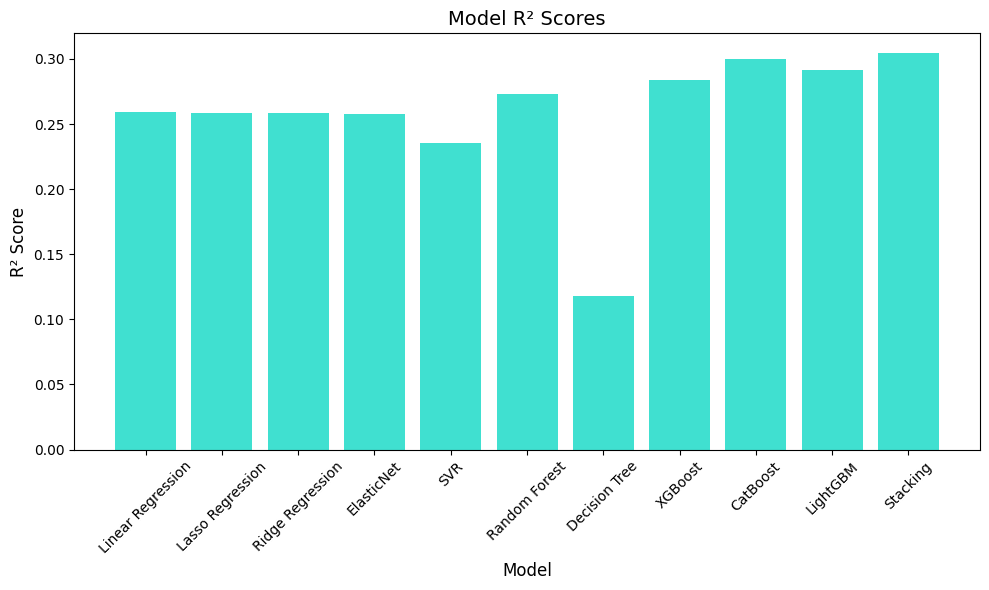

In [436]:
plt.figure(figsize=(10, 6))
plt.bar(r2_scores.keys(), r2_scores.values(), color='#40E0D0')
plt.title('Model R² Scores', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Mean Squared Error (MSE)**

In [437]:
mse_scores = {model: round(results[model]['Mean Squared Error (MSE)'], 4) for model in results}
mse_table = pd.DataFrame(list(mse_scores.items()), columns=['Model', 'Mean Squared Error (MSE)'])
print("MSE Table:")
mse_table

MSE Table:


,Model,Mean Squared Error (MSE)
0,Linear Regression,14.3988
1,Lasso Regression,14.4032
2,Ridge Regression,14.4016
3,ElasticNet,14.4258
4,SVR,14.8560
5,Random Forest,14.1187
6,Decision Tree,17.1391
7,XGBoost,13.9200
8,CatBoost,13.6022
9,LightGBM,13.7674


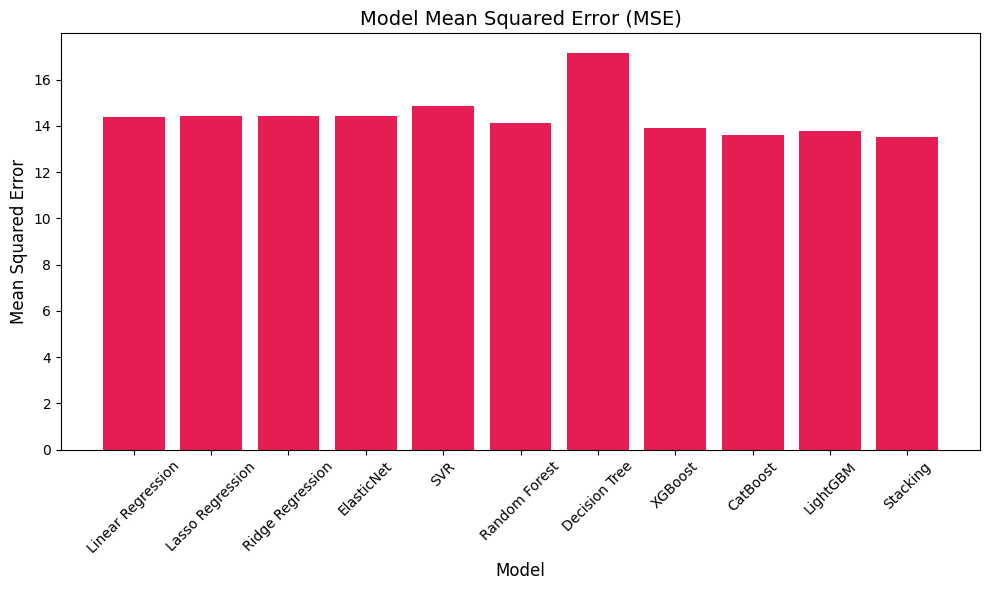

In [438]:
plt.figure(figsize=(10, 6))
plt.bar(mse_scores.keys(), mse_scores.values(), color='#E41D53')
plt.title('Model Mean Squared Error (MSE)', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Model Time Comparison**

#### **Training Time**

In [439]:
train_times = {
    'Linear Regression': train_time_linear,
    'Lasso': train_time_lasso,
    'Ridge': train_time_ridge,
    'ElasticNet': train_time_elasticnet,
    'SVR': train_time_svr,
    'Random Forest': train_time_rf,
    'Decision Tree': train_time_dt,
    'XGBoost': train_time_xgb,
    'CatBoost': train_time_cat,
    'LightGBM': train_time_light,
    'Stacking': train_time_stack
}

In [440]:
train_times = {model:train_times[model] for model in train_times}
train_times_table = pd.DataFrame(list(train_times.items()), columns=['Model', 'Training Time (seconds)'])
print("Training Times Table:")
train_times_table

Training Times Table:


,Model,Training Time (seconds)
0,Linear Regression,0.006859
1,Lasso,1.937246
2,Ridge,0.230621
3,ElasticNet,2.096437
4,SVR,32.687840
5,Random Forest,32.684253
6,Decision Tree,1.096163
7,XGBoost,0.094636
8,CatBoost,5.904827
9,LightGBM,0.532637


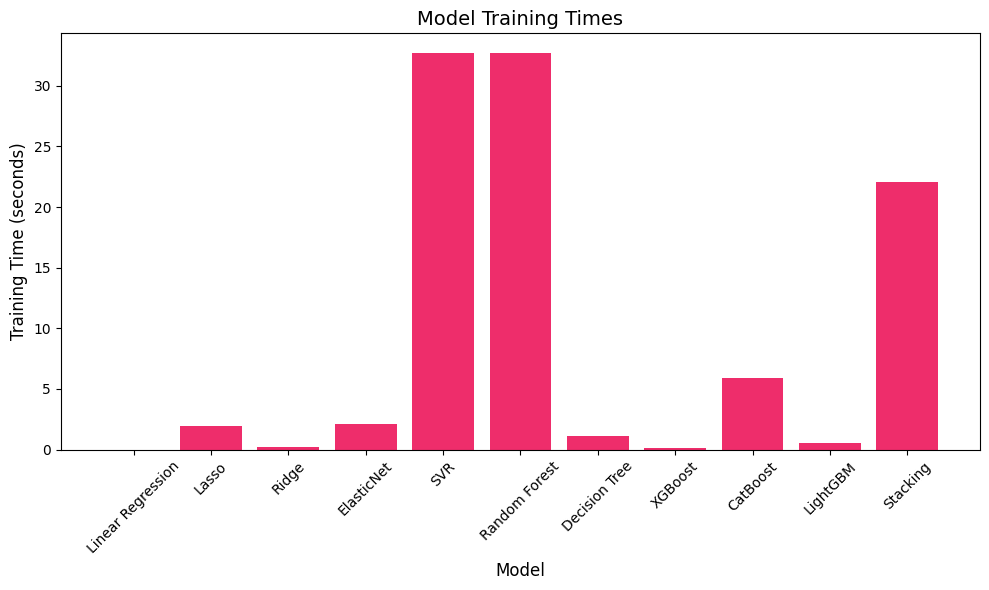

In [441]:
plt.figure(figsize=(10, 6))
plt.bar(train_times.keys(), train_times.values(), color='#EE2D6B', label='Training Time')
plt.title('Model Training Times', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Training Time (seconds)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Testing Time**

In [442]:
test_times={
    'Linear Regression': test_time_linear,
    'Lasso': test_time_lasso,
    'Ridge': test_time_ridge,
    'ElasticNet': test_time_elasticnet,
    'SVR': test_time_svr,
    'Random Forest': test_time_rf,
    'Decision Tree': test_time_dt,
    'XGBoost': test_time_xgb,
    'CatBoost': test_time_cat,
    'LightGBM': test_time_light,
    'Stacking': test_time_stack
}

In [443]:
test_times = {model: test_times[model] for model in test_times}
test_times_table = pd.DataFrame(list(test_times.items()), columns=['Model', 'Testing Time (seconds)'])
print("Testing Times Table:")
test_times_table

Testing Times Table:


,Model,Testing Time (seconds)
0,Linear Regression,0.001002
1,Lasso,0.001013
2,Ridge,0.000000
3,ElasticNet,0.001003
4,SVR,0.492578
5,Random Forest,0.012585
6,Decision Tree,0.001236
7,XGBoost,0.000000
8,CatBoost,0.003211
9,LightGBM,0.014389


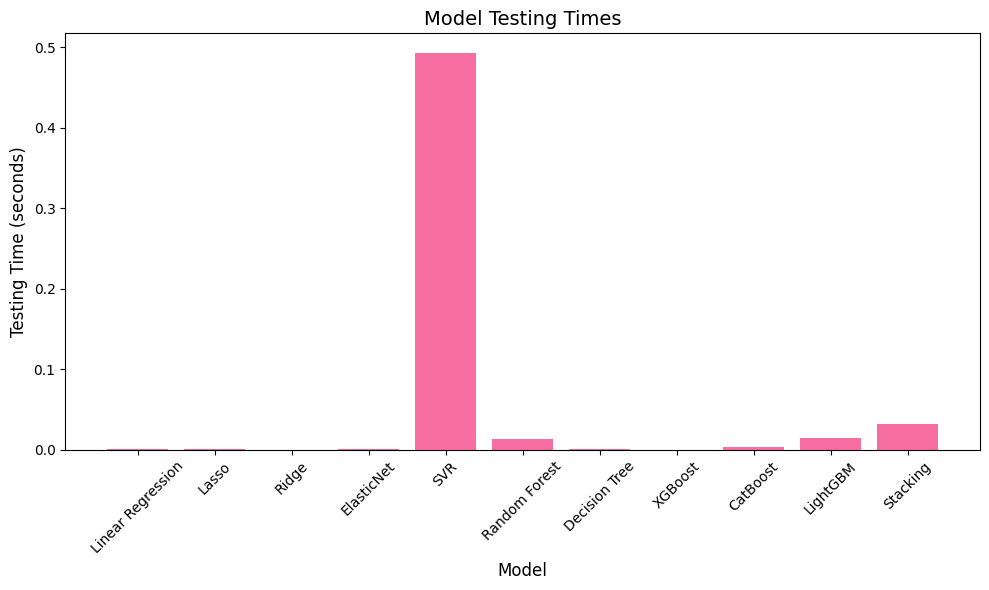

In [444]:
plt.figure(figsize=(10, 6))
plt.bar(test_times.keys(), test_times.values(), color='#F76EA0', label='Testing Time')
plt.title('Model Testing Times', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Testing Time (seconds)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Saving Models Using Joblib**

### **TFidf**

In [445]:
# import joblib
# joblib.dump(summary_tfidf, "regression_models/summary_tfidf_vectorizer")
# joblib.dump(space_tfidf, "regression_models/space_tfidf_vectorizer")
# joblib.dump(description_tfidf, "regression_models/description_tfidf_vectorizer")
# joblib.dump(notes_tfidf, "regression_models/notes_tfidf_vectorizer")
# joblib.dump(transit_tfidf, "regression_models/transit_tfidf_vectorizer")
# joblib.dump(access_tfidf, "regression_models/access_tfidf_vectorizer")
# joblib.dump(house_rules_tfidf, "regression_models/house_rules_tfidf_vectorizer")

### **SVD**

In [446]:
# joblib.dump(svd_summary, "regression_models/svd_summary_model")
# joblib.dump(svd_space, "regression_models/svd_space_model")
# joblib.dump(svd_transit, "regression_models/svd_transit_model")
# joblib.dump(svd_access, "regression_models/svd_access_model")
# joblib.dump(svd_description, "regression_models/svd_description_model")
# joblib.dump(svd_notes, "regression_models/svd_notes_model")
# joblib.dump(svd_house_rules, "regression_models/svd_house_rules_model")

### **Label Encoder**

In [447]:
# joblib.dump(label_encoders, 'regression_models/label_encoders')

### **Scaler**

In [448]:
# joblib.dump(scaler, 'regression_models/scaler')

### **Model**

In [449]:
# joblib.dump(stacked_model3, 'regression_models/stacked_model')

## **Conclusion**

- The **Stacking model** achieved the highest R² score (**0.3044**), meaning it explained the most variance in the target variable among all models.
- **CatBoost** (**0.2999**) and **XGBoost** (**0.2835**) also performed strongly, showing that gradient boosting models are very effective for this task.
- **LightGBM** followed closely with an R² of **0.2914**, confirming the power of boosting algorithms.
- Traditional linear models (**Linear Regression**, **Lasso**, **Ridge**, **ElasticNet**) all showed similar performance (~0.26), but they clearly underperformed compared to ensemble methods.
- **SVR** (Support Vector Regression) performed the worst (**0.2353**), suggesting SVM-based approaches might not be ideal for this dataset.
- **Random Forest** slightly outperformed linear models but still lagged behind boosting methods with an R² of **0.2733**.
- **Decision Tree** achieved an R² of **0.1178**, significantly underperforming compared to all other models, which suggests that the Decision Tree model might not be capturing the underlying patterns in the data as effectively as the other models.

##### **Key Insight**:

> **Ensemble models**, especially **boosting** and **stacking**, significantly outperform traditional regression methods and simpler models on this dataset.

